# Step 1: Data Acquisition & Basic Exploration
In this step, we will:
- Download and load the dataset
- Inspect the file structure
- Confirm data shape and basic info

**Validation Criteria:** 
- Dataset successfully loaded into a DataFrame.
- Column names and data types make sense.


In [1]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Download and load dataset
path = kagglehub.dataset_download("taeefnajib/used-car-price-prediction-dataset")
print("Path to dataset files:", path)

files = os.listdir(path)
print("Files in directory:", files)

df = pd.read_csv(os.path.join(path, "used_cars.csv"))

print("Initial Dataset Head:")
display(df.head())

print("Dataset Shape:", df.shape)
print("Dataset Info:")
df.info()


/Users/rayva/Desktop/stat432_final/stat432_venv_311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/rayva/.cache/kagglehub/datasets/taeefnajib/used-car-price-prediction-dataset/versions/1
Files in directory: ['used_cars.csv']
Initial Dataset Head:


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


Dataset Shape: (4009, 12)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


# Step 2: Initial Examination of Data
We will:
- Check for missing values
- Examine data types and unique values in categorical columns
- Review initial summary statistics

**Validation Criteria:**
- Identified which columns have missing values.
- Confirmed basic data structure and variable types.



Missing Values:


clean_title     596
fuel_type       170
accident        113
brand             0
model             0
model_year        0
milage            0
engine            0
transmission      0
ext_col           0
int_col           0
price             0
dtype: int64


Unique Values:


milage          2818
model           1898
price           1569
engine          1146
ext_col          319
int_col          156
transmission      62
brand             57
model_year        34
fuel_type          7
accident           2
clean_title        1
dtype: int64


Sample of Unique Values in Text Columns:

brand unique values (first 5):
['Ford' 'Hyundai' 'Lexus' 'INFINITI' 'Audi']

model unique values (first 5):
['Utility Police Interceptor Base' 'Palisade SEL' 'RX 350 RX 350'
 'Q50 Hybrid Sport' 'Q3 45 S line Premium Plus']

milage unique values (first 5):
['51,000 mi.' '34,742 mi.' '22,372 mi.' '88,900 mi.' '9,835 mi.']

fuel_type unique values (first 5):
['E85 Flex Fuel' 'Gasoline' 'Hybrid' nan 'Diesel']

engine unique values (first 5):
['300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capability'
 '3.8L V6 24V GDI DOHC' '3.5 Liter DOHC'
 '354.0HP 3.5L V6 Cylinder Engine Gas/Electric Hybrid'
 '2.0L I4 16V GDI DOHC Turbo']

transmission unique values (first 5):
['6-Speed A/T' '8-Speed Automatic' 'Automatic' '7-Speed A/T' 'F']

ext_col unique values (first 5):
['Black' 'Moonlight Cloud' 'Blue' 'Glacier White Metallic' 'Silver']

int_col unique values (first 5):
['Black' 'Gray' 'Ebony.' 'Green' 'Pimento / Ebony']

accident unique values (first 5):
['A

,model_year,milage,price
count,4009.000000,4009.000000,4.009000e+03
mean,2015.515590,64717.551010,4.455319e+04
std,6.104816,52296.599459,7.871064e+04
min,1974.000000,100.000000,2.000000e+03
25%,2012.000000,23044.000000,1.720000e+04
50%,2017.000000,52775.000000,3.100000e+04
75%,2020.000000,94100.000000,4.999000e+04
max,2024.000000,405000.000000,2.954083e+06


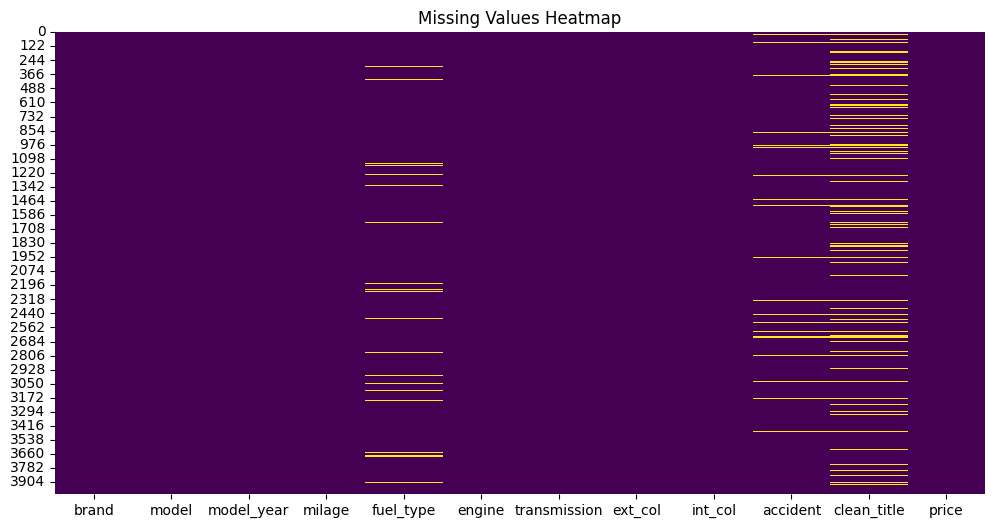

In [2]:
# Missing values
print("\nMissing Values:")
missing_counts = df.isnull().sum().sort_values(ascending=False)
display(missing_counts)

print("\nUnique Values:")
unique_counts = df.nunique().sort_values(ascending=False)
display(unique_counts)

# Unique values in categorical columns
print("\nSample of Unique Values in Text Columns:")
for column in df.select_dtypes(include=['object']).columns:
    print(f"\n{column} unique values (first 5):")
    print(df[column].unique()[:5])
    
if df['price'].dtype == 'object':
    df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

if 'milage' in df.columns and df['milage'].dtype == 'object':
    df['milage'] = df['milage'].replace('[, mi. ]', '', regex=True).astype(float)


# Summary statistics
print("\nSummary Statistics:")
display(df.describe())

# Visualize missingness
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [3]:
# After df.info() and before histograms of price/mileage:
price_cap = df['price'].quantile(0.99)
df['price'] = np.where(df['price'] > price_cap, price_cap, df['price'])

milage_cap = df['milage'].quantile(0.99)
df['milage'] = np.where(df['milage'] > milage_cap, milage_cap, df['milage'])


In [4]:


# Ensure all rows are displayed
pd.set_option('display.max_rows', None)

# Display the full list of unique transmission values and their counts
transmission_counts = df['transmission'].value_counts()
display(transmission_counts)

# Optionally reset the display setting
pd.reset_option('display.max_rows')


transmission
A/T                                                                 1037
8-Speed A/T                                                          406
Transmission w/Dual Shift Mode                                       398
6-Speed A/T                                                          362
6-Speed M/T                                                          248
Automatic                                                            237
7-Speed A/T                                                          209
8-Speed Automatic                                                    176
10-Speed A/T                                                         119
5-Speed A/T                                                           86
9-Speed A/T                                                           74
6-Speed Automatic                                                     73
4-Speed A/T                                                           72
1-Speed A/T                           

In [5]:
from scipy.stats import zscore
# Identify outliers for numerical features using Z-scores
numerical_features = ['price', 'milage', 'model_year']
outliers_dict = {}

for feature in numerical_features:
    z_scores = zscore(df[feature])
    outliers = df[abs(z_scores) > 3]  # Z-score > 3
    outliers_dict[feature] = outliers


# Step 3: Univariate Analysis
- Investigate distributions of key numeric variables (e.g., price, mileage).
- Identify outliers and skewness.
- Understand categorical variable distributions (frequency counts).

**Validation Criteria:**
- Major outliers noted.
- Skewness identified for variables (e.g., price, mileage).


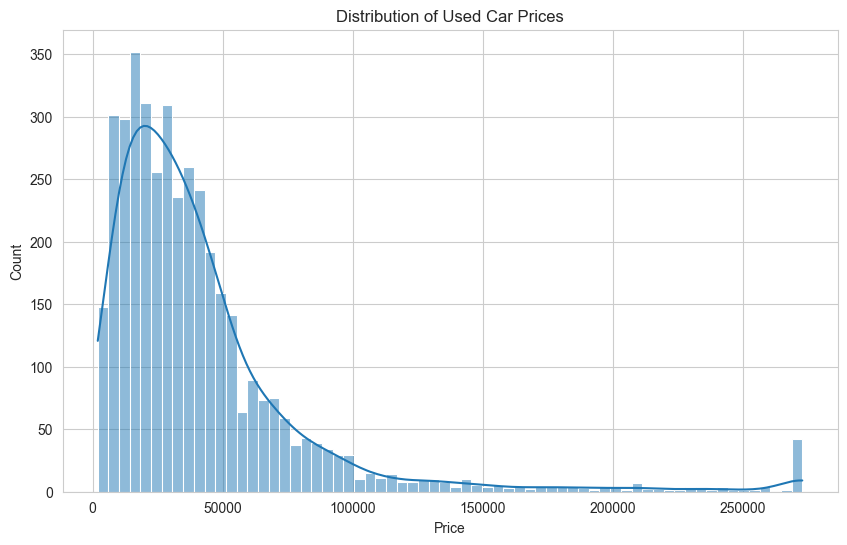

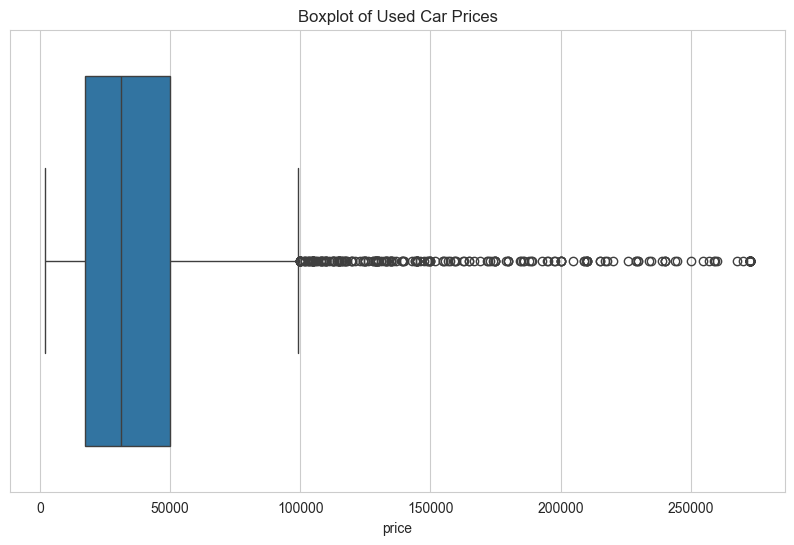


Mileage Statistics:


count      4009.000000
mean      64359.644300
std       50909.514368
min         100.000000
25%       23044.000000
50%       52775.000000
75%       94100.000000
max      222428.000000
Name: milage, dtype: float64

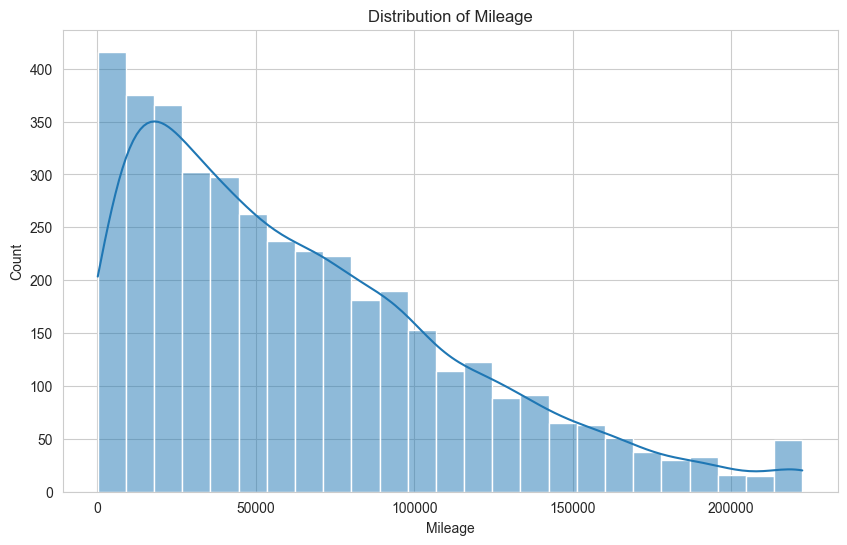

In [6]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Clean price column if needed
if df['price'].dtype == 'object':
    df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Distribution of price
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Used Car Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# Outliers in price
sns.boxplot(x=df['price'])
plt.title('Boxplot of Used Car Prices')
plt.show()

# Check zero or invalid prices

# Mileage distribution (convert if needed)
if 'milage' in df.columns and df['milage'].dtype == 'object':
    df['milage'] = df['milage'].replace('[, mi. ]', '', regex=True).astype(float)

print("\nMileage Statistics:")
display(df['milage'].describe())

sns.histplot(df['milage'], kde=True)
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')
plt.show()


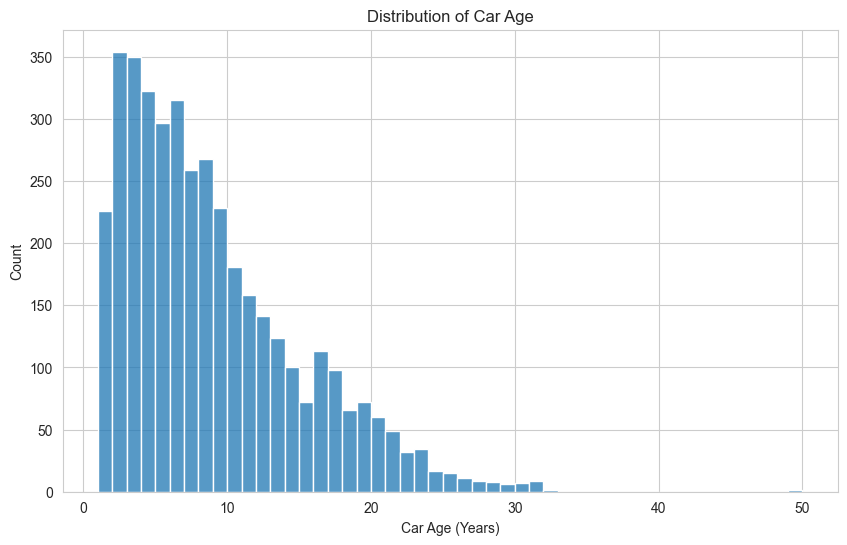

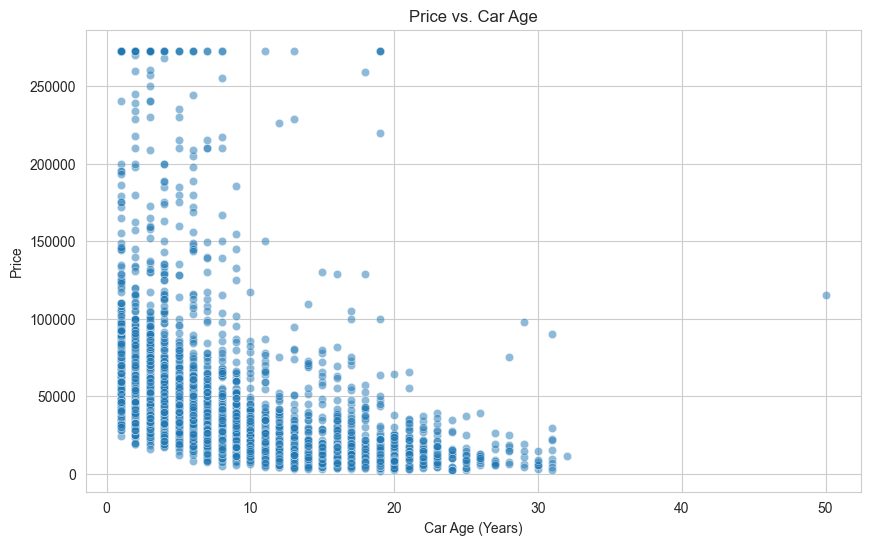

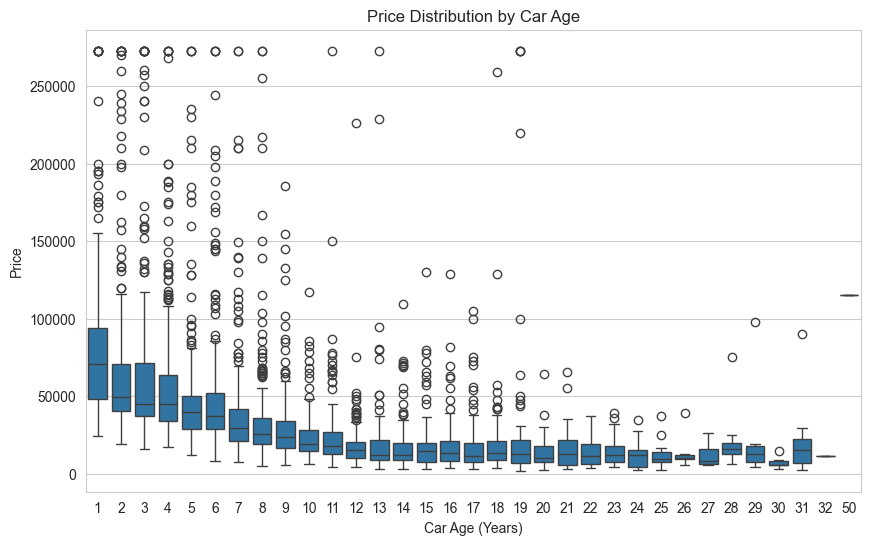

In [7]:
# Ensure 'model_year' is numeric and calculate 'car_age'
if 'model_year' in df.columns:
    df['model_year'] = pd.to_numeric(df['model_year'], errors='coerce')
    current_year = 2024
    df['car_age'] = current_year - df['model_year']

# Ensure car_age is integer
df['car_age'] = df['car_age'].fillna(0).astype(int)

# After calculating car_age and before plotting distributions:
df = df[df['car_age'] > 0]


# Plot car_age distribution
sns.histplot(df['car_age'], kde=False, bins=range(int(df['car_age'].min()), int(df['car_age'].max()) + 1))
plt.title('Distribution of Car Age')
plt.xlabel('Car Age (Years)')
plt.ylabel('Count')
plt.show()

# Scatter plot of price vs. car_age
sns.scatterplot(x='car_age', y='price', data=df, alpha=0.5)
plt.title('Price vs. Car Age')
plt.xlabel('Car Age (Years)')
plt.ylabel('Price')
plt.show()

# Boxplot of price grouped by car_age
sns.boxplot(x='car_age', y='price', data=df)
plt.title('Price Distribution by Car Age')
plt.xlabel('Car Age (Years)')
plt.ylabel('Price')
plt.show()


In [8]:
# Count the number of rows where car_age is 0
num_rows_to_remove = df[df['car_age'] == 0].shape[0]

# Preview rows with car_age = 0
rows_to_remove = df[df['car_age'] == 0]
print("Rows with car_age = 0:")


Rows with car_age = 0:


In [9]:
# Identify the three highest-priced cars
top_outliers = df.nlargest(3, 'price')
print(top_outliers)




           brand                    model  model_year  milage fuel_type  \
76   Lamborghini    Huracan Tecnica Coupe        2023   255.0  Gasoline   
93         Aston  Martin DBS Superleggera        2021  2165.0  Gasoline   
180      Porsche               911 GT2 RS        2018  4529.0  Gasoline   

                                                engine  \
76   5.2L V-10 gasoline direct injection, DOHC, var...   
93                    5.2L V12 48V GDI DOHC Twin Turbo   
180                    3.8L H6 24V GDI DOHC Twin Turbo   

                          transmission    ext_col   int_col       accident  \
76                           Automatic  BLU ELEOS  Nero Ade  None reported   
93                   8-Speed Automatic      Black     Black  None reported   
180  7-Speed Automatic with Auto-Shift      Black     Black  None reported   

    clean_title      price  car_age  
76          NaN  272713.28        1  
93          Yes  272713.28        3  
180         Yes  272713.28        6  


Luxury Car Counts:
brand
Porsche        201
Maserati        34
Bentley         33
Lamborghini     26
Ferrari         12
Rolls-Royce     11
McLaren          6
Bugatti          1
Name: count, dtype: int64


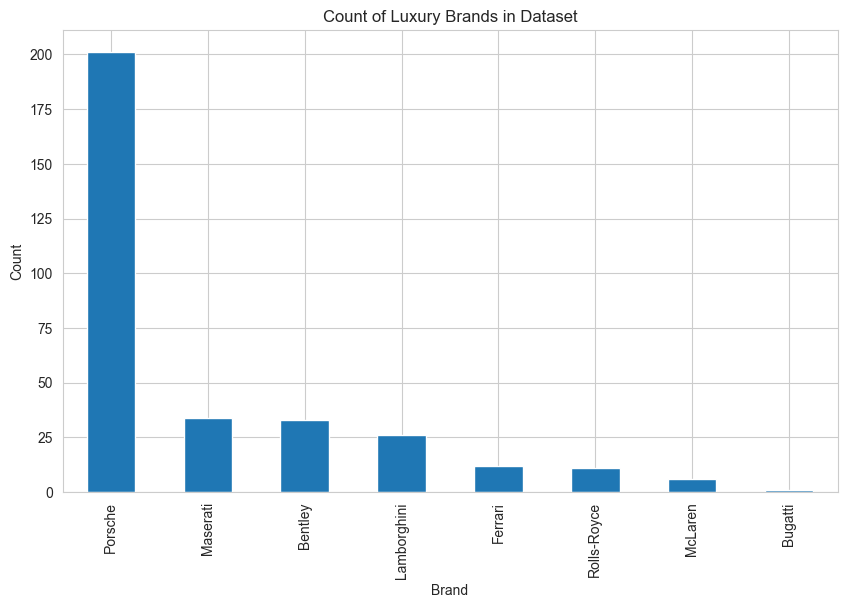

In [10]:
# Define the list of luxury car brands
luxury_brands = ['Bugatti', 'Maserati', 'Porsche', 'Ferrari', 'Lamborghini', 
                 'Bentley', 'Rolls-Royce', 'Aston Martin', 'McLaren', '']

# Filter the dataset for luxury brands
luxury_cars = df[df['brand'].isin(luxury_brands)]

# Count the occurrences of each luxury brand
luxury_counts = luxury_cars['brand'].value_counts()

# Display the results
print("Luxury Car Counts:")
print(luxury_counts)

# Visualize the counts
luxury_counts.plot(kind='bar', figsize=(10, 6), title='Count of Luxury Brands in Dataset')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

In [11]:
#   df = df[~((df['brand'] == 'Bugatti') & 
#          (df['model'].str.contains('Veyron 16.4 Grand Sport', na=False)) & 
#          (df['model_year'] == 2011))]


Value Counts for brand:


brand
Ford             386
BMW              372
Mercedes-Benz    315
Chevrolet        292
Porsche          201
Bugatti            1
Plymouth           1
smart              1
Maybach            1
Suzuki             1
Name: count, dtype: int64

/var/folders/4c/xwnhl2w95z7gvrgl4bz_wfhr0000gn/T/ipykernel_62252/811126371.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


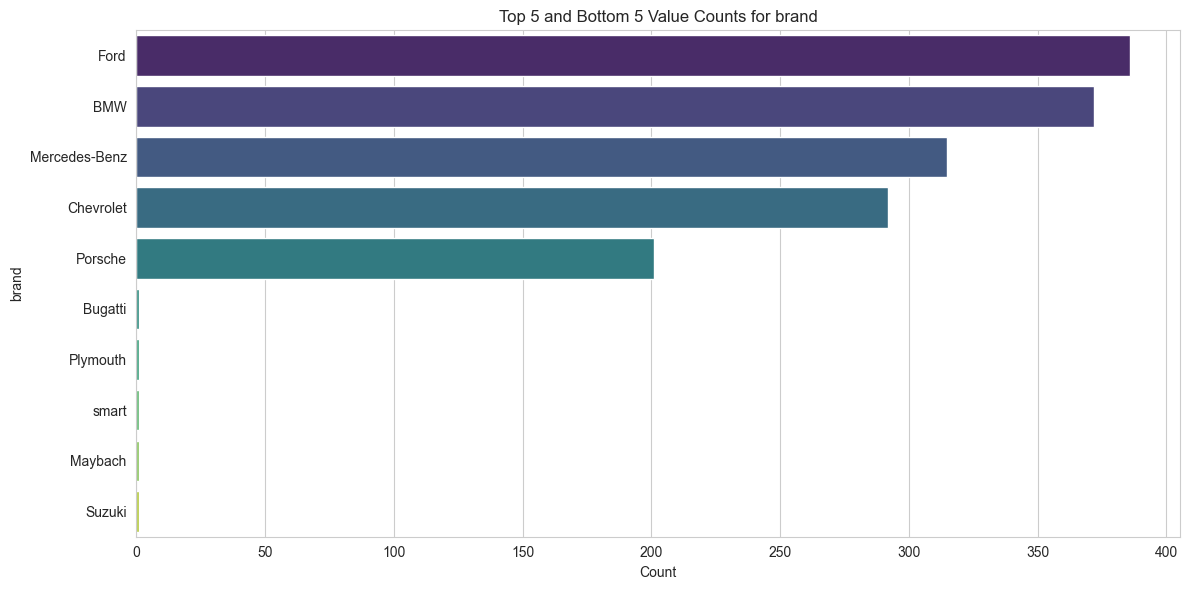


Value Counts for model:


model
M3 Base                    30
F-150 XLT                  24
Corvette Base              22
1500 Laramie               18
Model Y Long Range         17
G80 3.3T Sport              1
XE 25t                      1
MC20 Base                   1
911 Carrera 4 Cabriolet     1
Taycan                      1
Name: count, dtype: int64

/var/folders/4c/xwnhl2w95z7gvrgl4bz_wfhr0000gn/T/ipykernel_62252/811126371.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


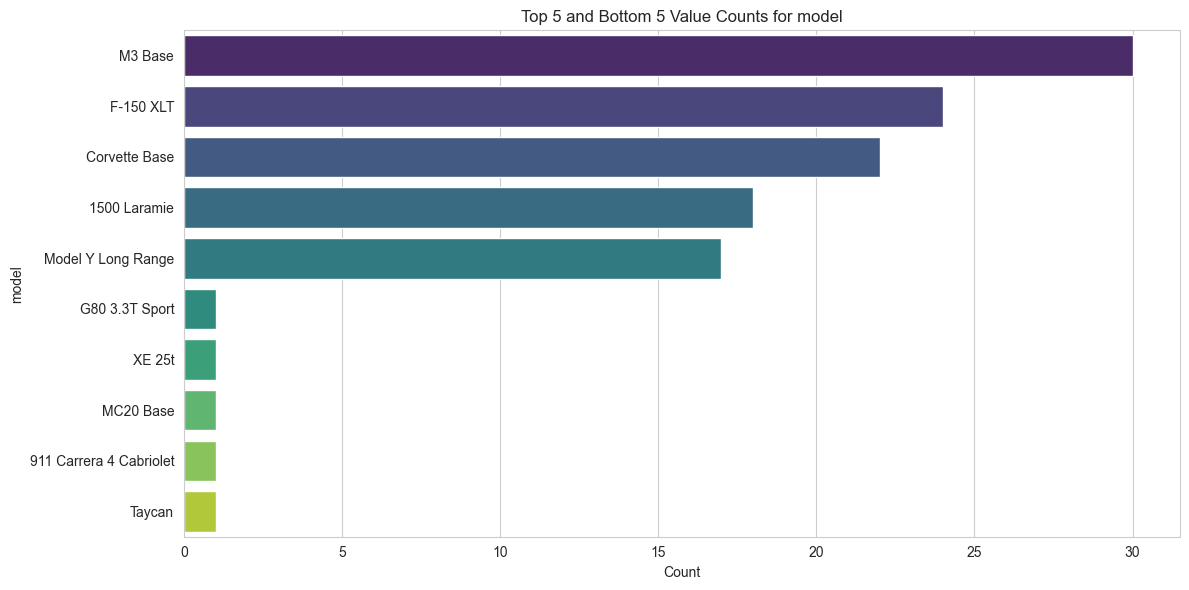


Value Counts for fuel_type:


fuel_type
Gasoline          3304
Hybrid             193
E85 Flex Fuel      139
Diesel             116
–                   45
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: count, dtype: int64

/var/folders/4c/xwnhl2w95z7gvrgl4bz_wfhr0000gn/T/ipykernel_62252/811126371.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


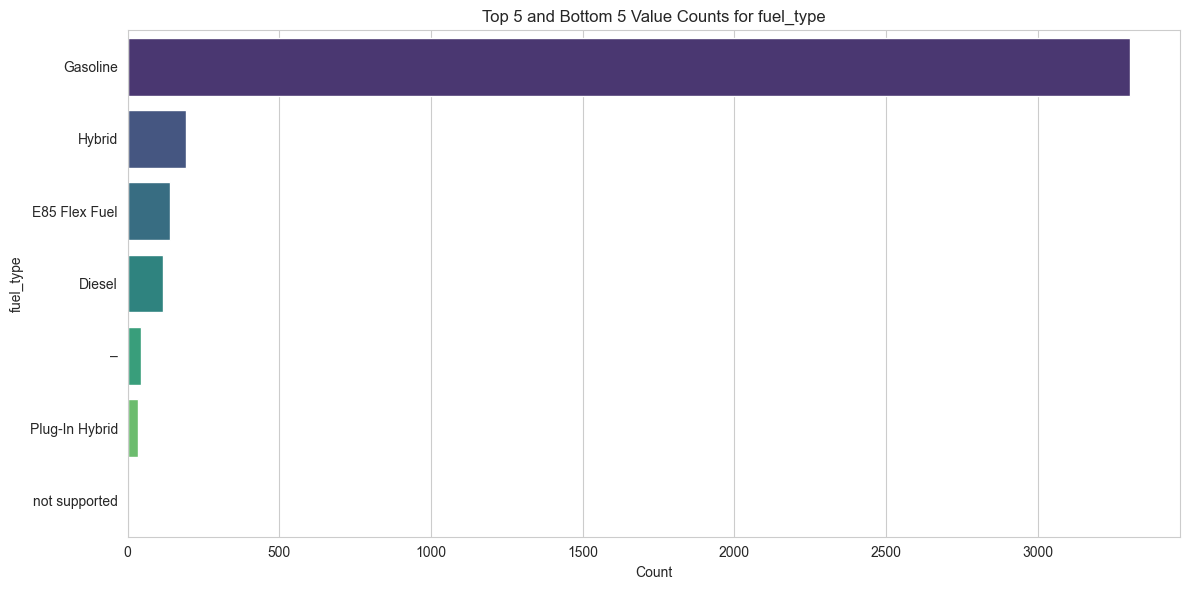


Value Counts for transmission:


transmission
A/T                                              1035
8-Speed A/T                                       406
Transmission w/Dual Shift Mode                    396
6-Speed A/T                                       362
6-Speed M/T                                       248
Automatic, 8-Spd PDK Dual-Clutch                    1
Auto, 6-Spd w/CmdShft                               1
Automatic, 8-Spd Sport w/Sport & Manual Modes       1
CVT-F                                               1
8-Speed Manual                                      1
Name: count, dtype: int64

/var/folders/4c/xwnhl2w95z7gvrgl4bz_wfhr0000gn/T/ipykernel_62252/811126371.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


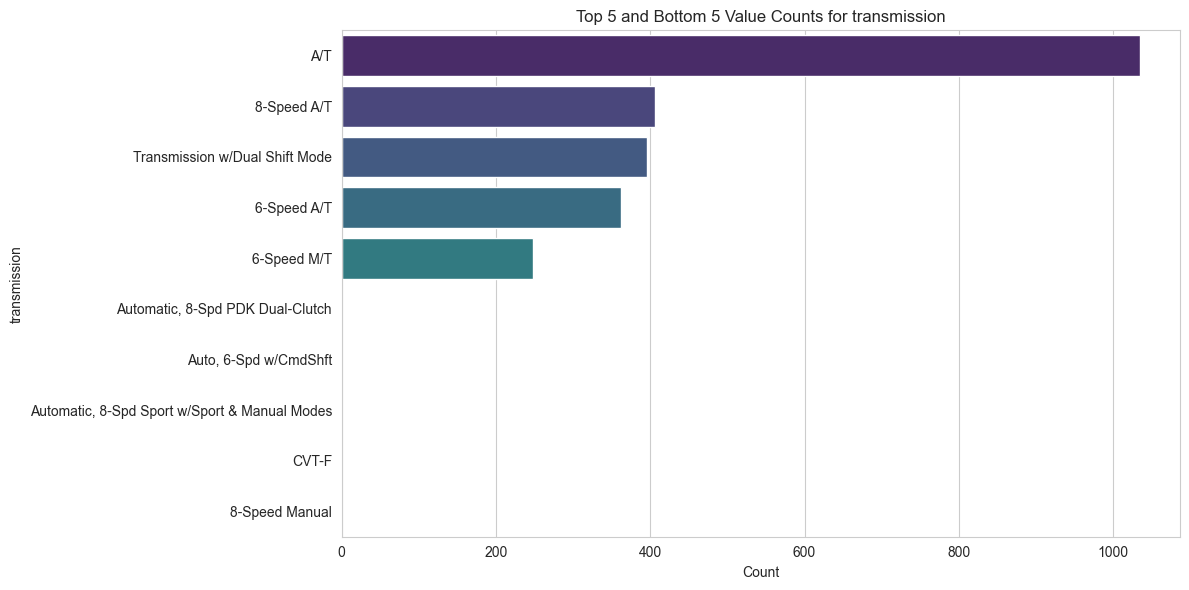


Value Counts for ext_col:


ext_col
Black                       903
White                       815
Gray                        495
Silver                      374
Blue                        349
Sangria Red                   1
designo Diamond White         1
Anthracite Blue Metallic      1
Moonlight Cloud               1
C / C                         1
Name: count, dtype: int64

/var/folders/4c/xwnhl2w95z7gvrgl4bz_wfhr0000gn/T/ipykernel_62252/811126371.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


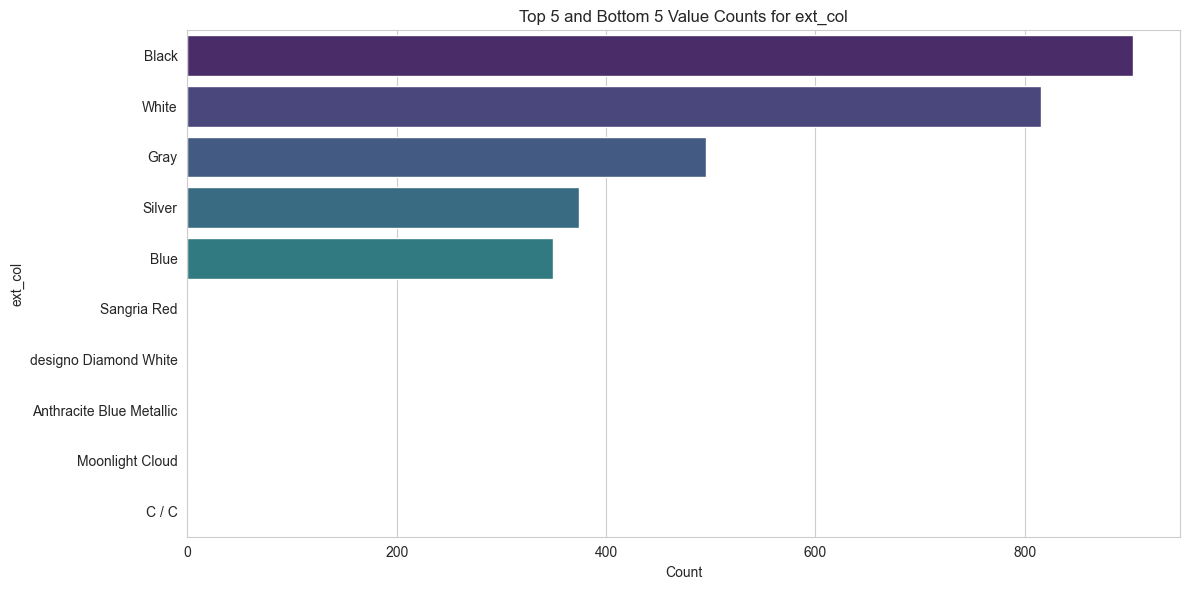


Value Counts for int_col:


int_col
Black               2020
Beige                538
Gray                 472
Brown                156
–                    133
Almond Beige           1
Kyalami Orange         1
Sakhir Orange          1
Tan/Ebony              1
Black / Graphite       1
Name: count, dtype: int64

/var/folders/4c/xwnhl2w95z7gvrgl4bz_wfhr0000gn/T/ipykernel_62252/811126371.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


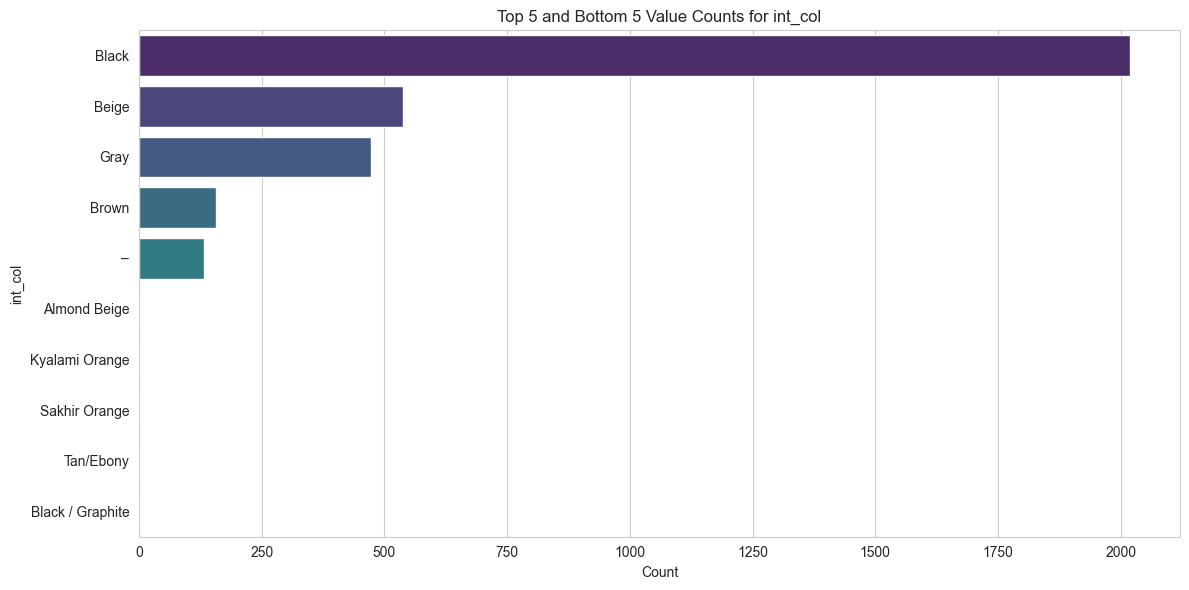


Value Counts for clean_title:


clean_title
Yes    3407
Yes    3407
Name: count, dtype: int64

/var/folders/4c/xwnhl2w95z7gvrgl4bz_wfhr0000gn/T/ipykernel_62252/811126371.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


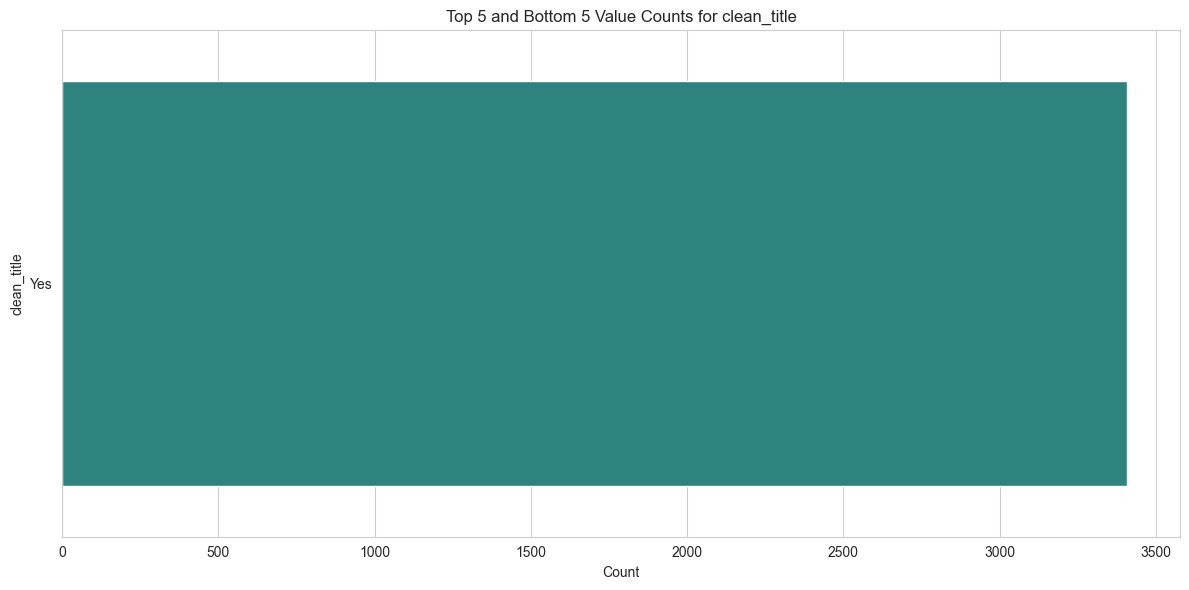


Value Counts for accident:


accident
None reported                             2904
At least 1 accident or damage reported     986
None reported                             2904
At least 1 accident or damage reported     986
Name: count, dtype: int64

/var/folders/4c/xwnhl2w95z7gvrgl4bz_wfhr0000gn/T/ipykernel_62252/811126371.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


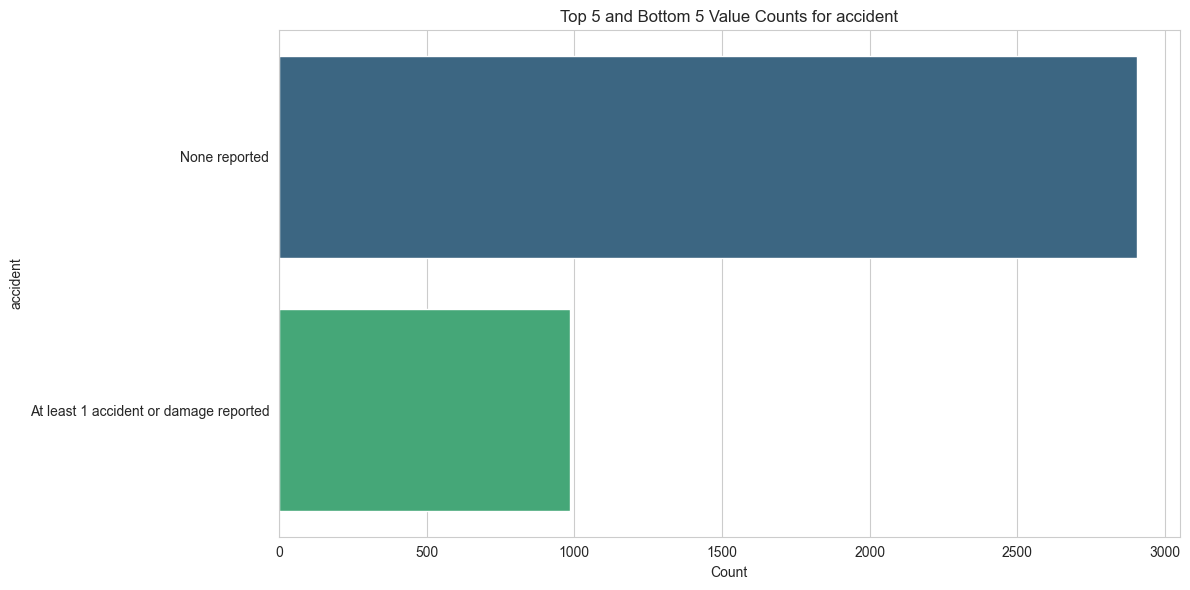

In [12]:
# Categorical features (adjust list if needed)
possible_cats = ['brand', 'model', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'clean_title', 'accident']
categorical_features = [c for c in possible_cats if c in df.columns]

for cat in categorical_features:
    print(f"\nValue Counts for {cat}:")
    
    # Get value counts
    value_counts = df[cat].value_counts()

    # Display top 5 and bottom 5
    top_5 = value_counts.head(5)
    bottom_5 = value_counts.tail(5)
    combined = pd.concat([top_5, bottom_5])
    display(combined)
    
    # Horizontal bar plot for combined counts
    plt.figure(figsize=(12, 6))  # Adjust size dynamically
    sns.barplot(
        x=combined.values, 
        y=combined.index, 
        palette='viridis'
    )
    plt.title(f"Top 5 and Bottom 5 Value Counts for {cat}")
    plt.xlabel("Count")
    plt.ylabel(cat)
    plt.tight_layout()
    plt.show()


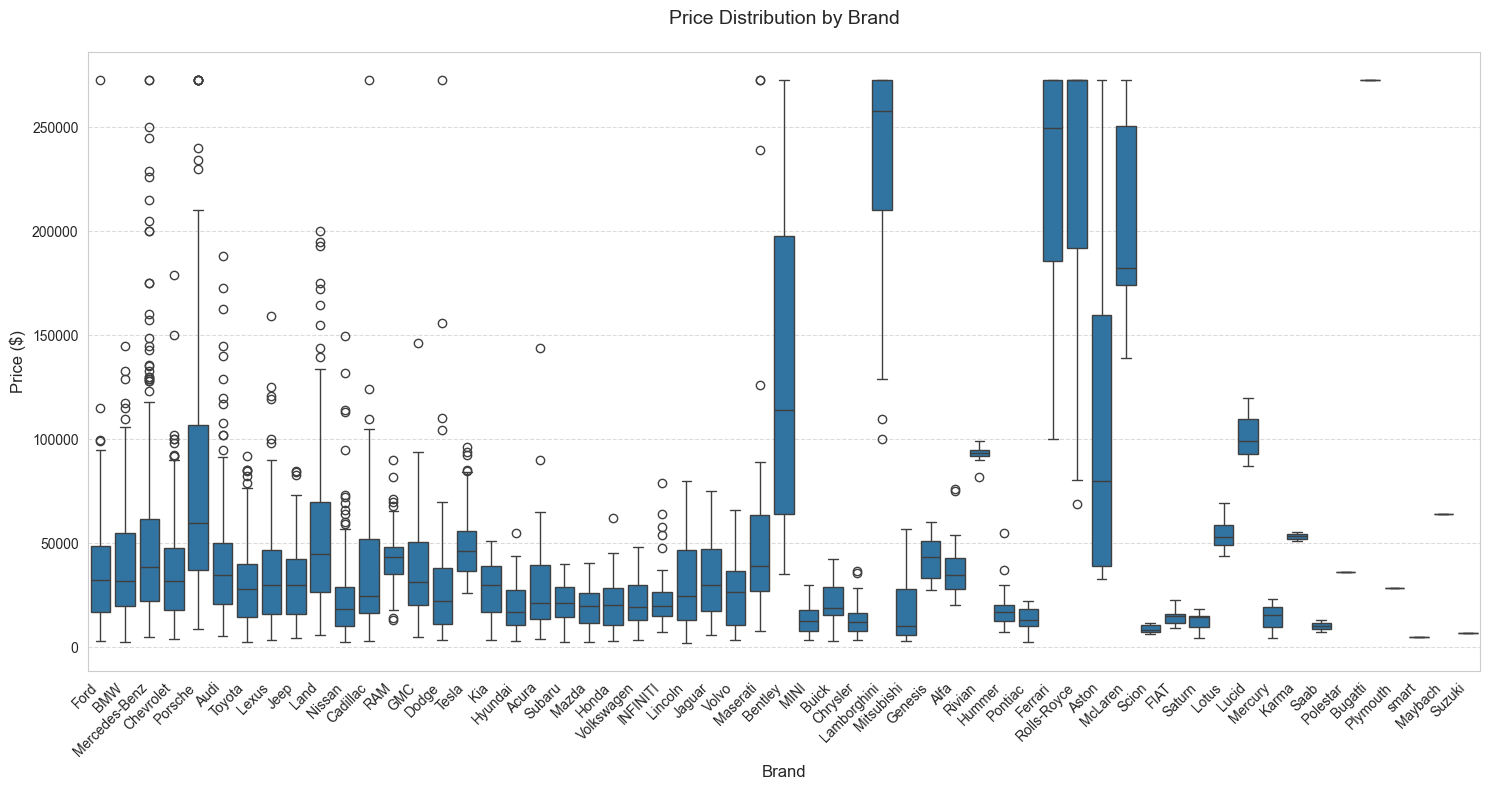

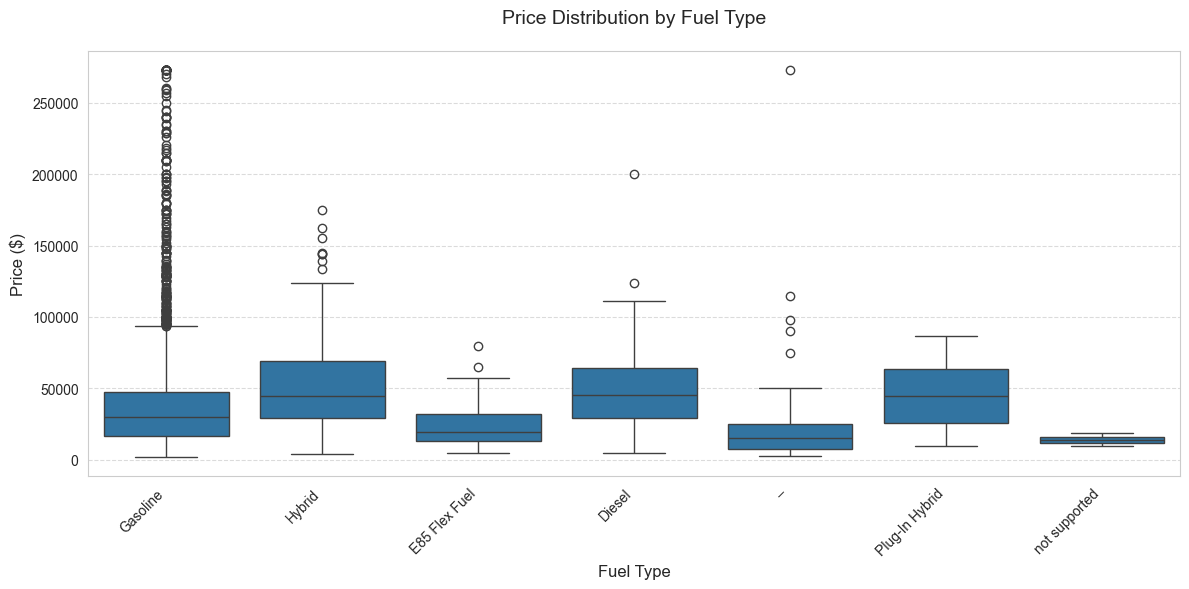

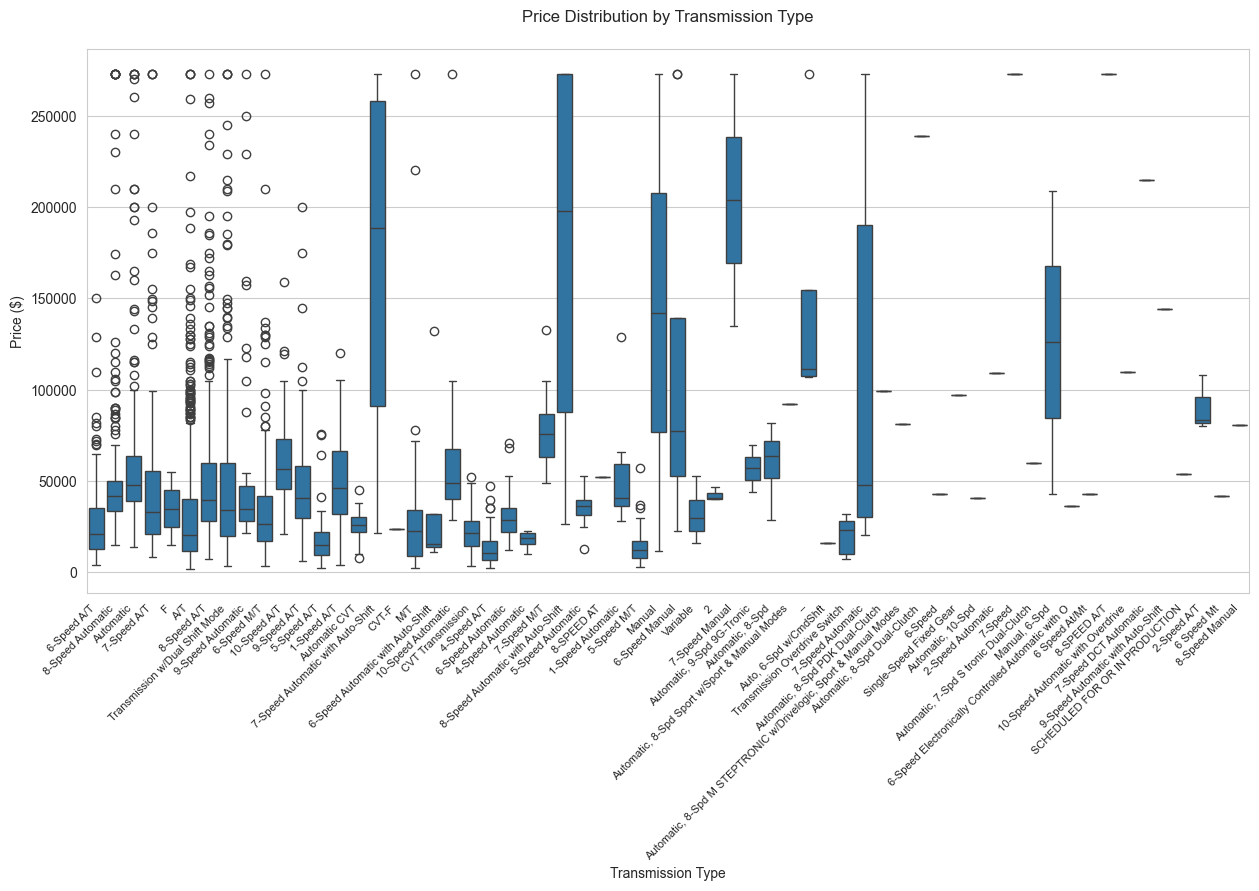

In [13]:
# Price Distribution by Brand
plt.figure(figsize=(15, 8))
sns.boxplot(x='brand', y='price', data=df, order=df['brand'].value_counts().index)

# Customize the plot
plt.title('Price Distribution by Brand', pad=20, fontsize=14)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

# Price Distribution by Fuel Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='fuel_type', y='price', data=df, order=df['fuel_type'].value_counts().index)

# Customize the plot
plt.title('Price Distribution by Fuel Type', pad=20, fontsize=14)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 8))
sns.boxplot(x='transmission', y='price', data=df)

# Customize the plot
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.title('Price Distribution by Transmission Type', pad=20)
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')

# Add more space at the bottom for labels
plt.subplots_adjust(bottom=0.2)

plt.show()


/var/folders/4c/xwnhl2w95z7gvrgl4bz_wfhr0000gn/T/ipykernel_62252/1416031507.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=brand_means.index, y=brand_means.values,


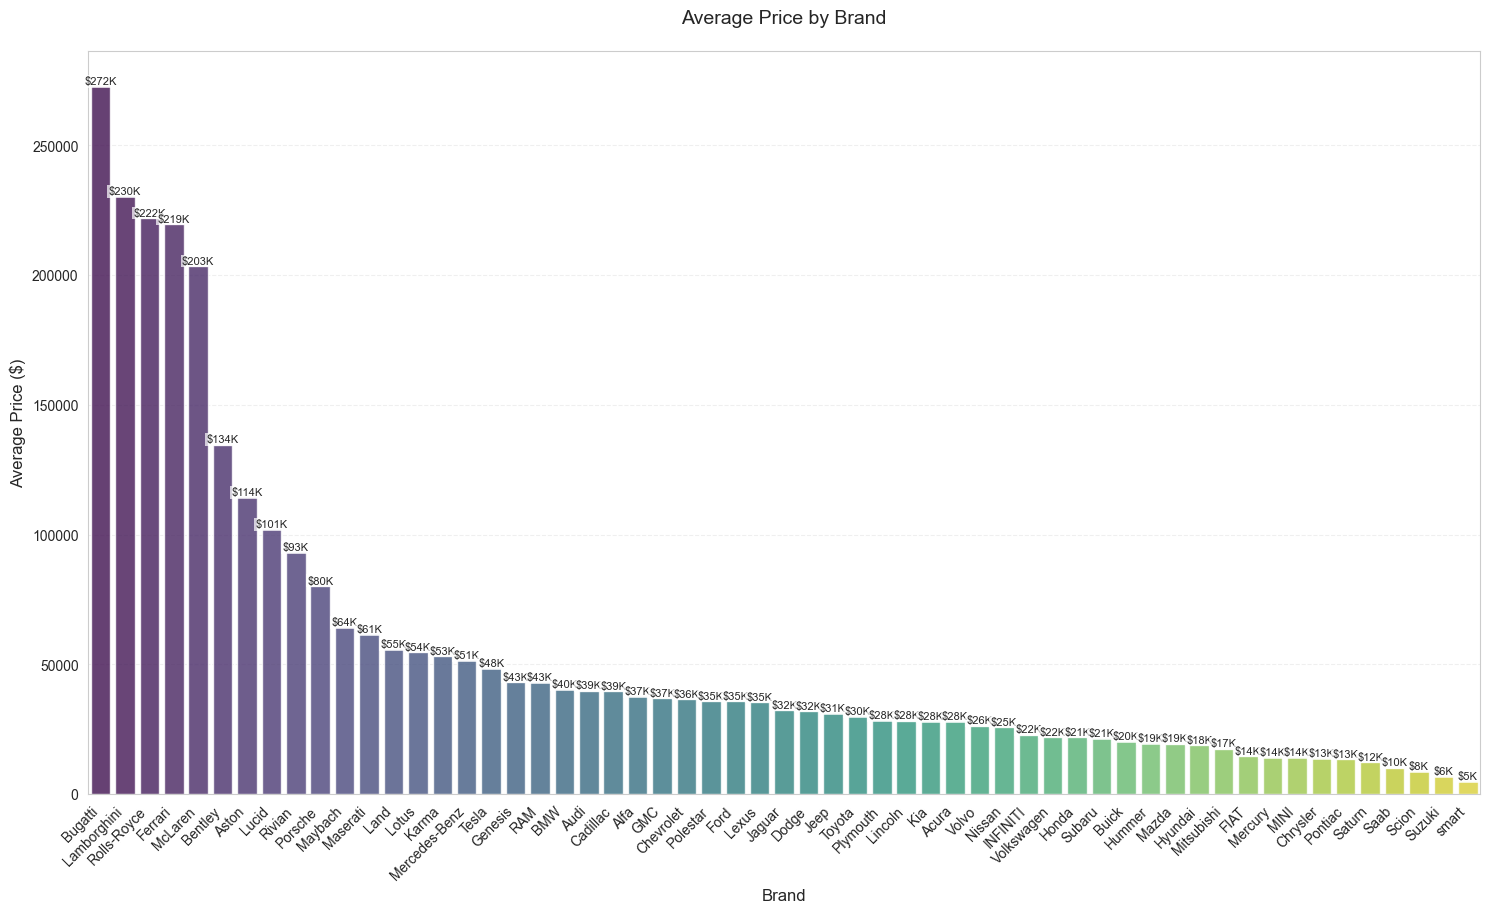

In [14]:
# Calculate mean prices by brand
brand_means = df.groupby('brand')['price'].mean().sort_values(ascending=False)

# Create figure with more height to accommodate labels
plt.figure(figsize=(15, 10))

# Create bar plot with custom styling
ax = sns.barplot(x=brand_means.index, y=brand_means.values, 
                palette='viridis',
                alpha=0.8)

# Customize the plot
plt.title('Average Price by Brand', pad=20, fontsize=14)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)

# Rotate and align the tick labels so they look better
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add value labels on top of each bar with adjusted position and format
for i, v in enumerate(brand_means.values):
    # Add labels with some vertical offset and smaller font
    if v > 1000:  # Format differently for larger numbers
        label = f'${int(v/1000):,}K'
    else:
        label = f'${int(v):,}'
    
    ax.text(i, v, label,
            ha='center', va='bottom',
            fontsize=8,
            rotation=0,
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=1))

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Adjust bottom margin to prevent x-label cutoff
plt.subplots_adjust(bottom=0.2)

plt.show()

/var/folders/4c/xwnhl2w95z7gvrgl4bz_wfhr0000gn/T/ipykernel_62252/2195663275.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=brand_means.index, y=brand_means.values,


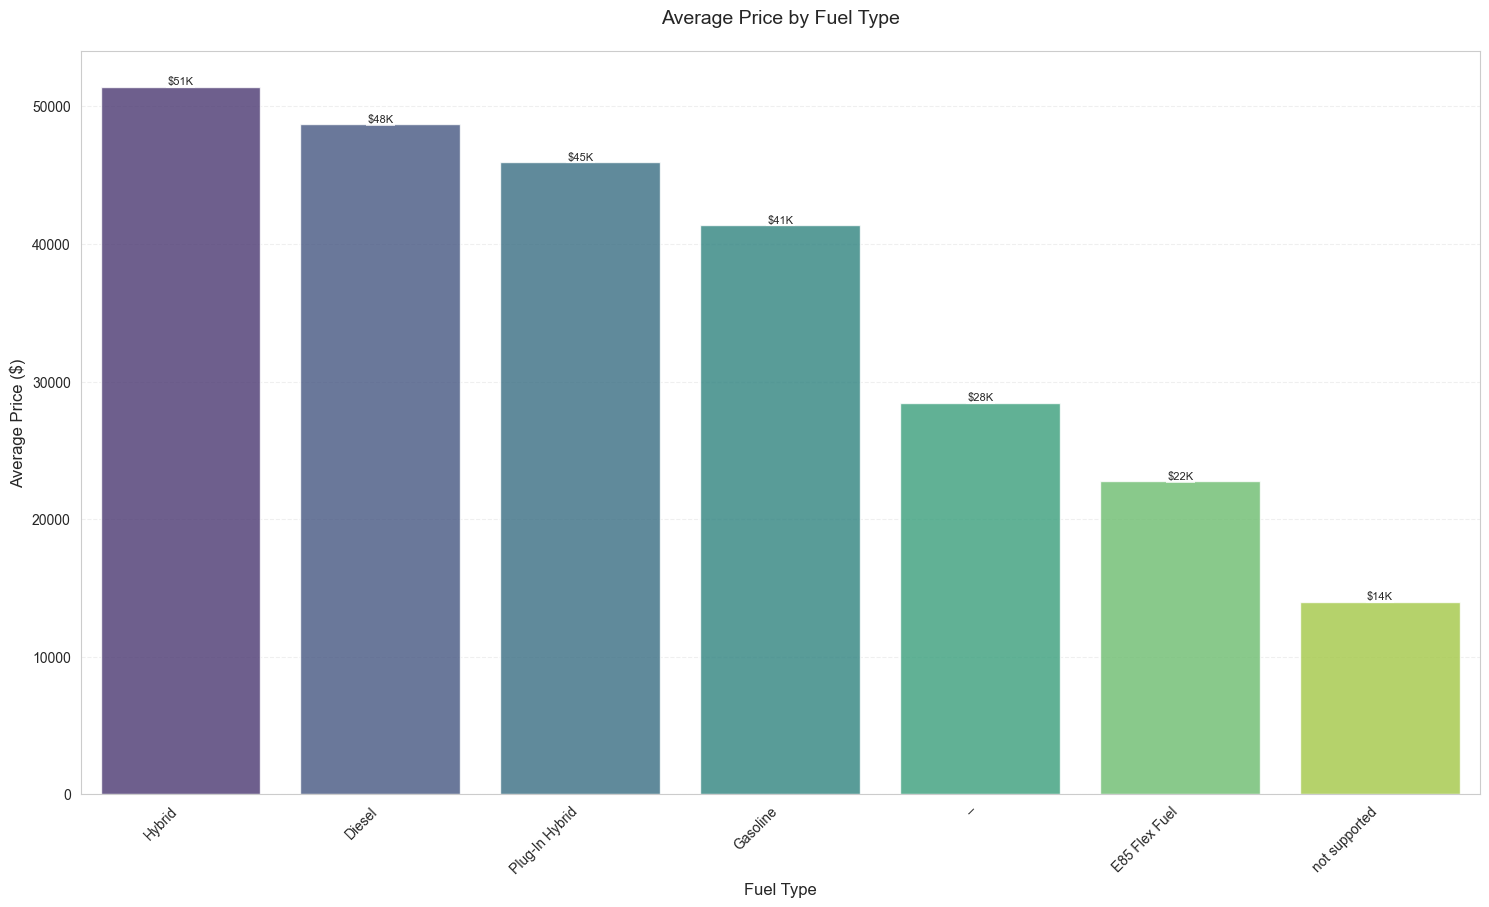

In [15]:
# Calculate mean prices by brand
brand_means = df.groupby('fuel_type')['price'].mean().sort_values(ascending=False)

# Create figure with more height to accommodate labels
plt.figure(figsize=(15, 10))

# Create bar plot with custom styling
ax = sns.barplot(x=brand_means.index, y=brand_means.values, 
                palette='viridis',
                alpha=0.8)

# Customize the plot
plt.title('Average Price by Fuel Type', pad=20, fontsize=14)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)

# Rotate and align the tick labels so they look better
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add value labels on top of each bar with adjusted position and format
for i, v in enumerate(brand_means.values):
    # Add labels with some vertical offset and smaller font
    if v > 1000:  # Format differently for larger numbers
        label = f'${int(v/1000):,}K'
    else:
        label = f'${int(v):,}'
    
    ax.text(i, v, label,
            ha='center', va='bottom',
            fontsize=8,
            rotation=0,
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=1))

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Adjust bottom margin to prevent x-label cutoff
plt.subplots_adjust(bottom=0.2)

plt.show()

/var/folders/4c/xwnhl2w95z7gvrgl4bz_wfhr0000gn/T/ipykernel_62252/144577368.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=brand_means.index, y=brand_means.values,


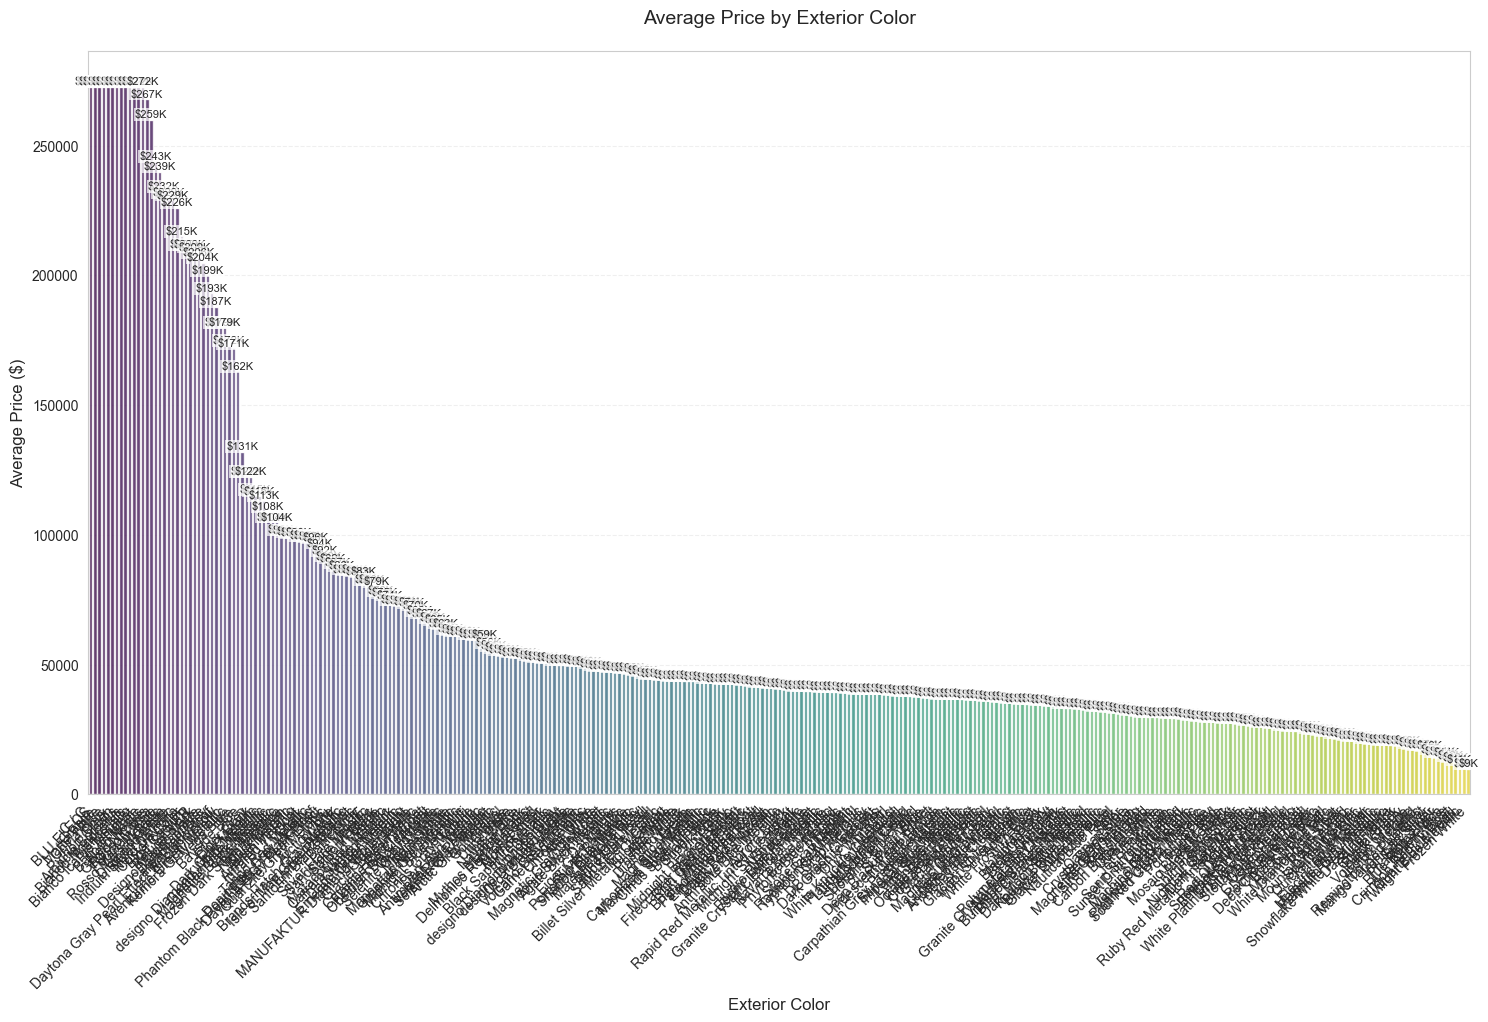

In [16]:
# Calculate mean prices by brand
brand_means = df.groupby('ext_col')['price'].mean().sort_values(ascending=False)

# Create figure with more height to accommodate labels
plt.figure(figsize=(15, 10))

# Create bar plot with custom styling
ax = sns.barplot(x=brand_means.index, y=brand_means.values, 
                palette='viridis',
                alpha=0.8)

# Customize the plot
plt.title('Average Price by Exterior Color', pad=20, fontsize=14)
plt.xlabel('Exterior Color', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)

# Rotate and align the tick labels so they look better
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add value labels on top of each bar with adjusted position and format
for i, v in enumerate(brand_means.values):
    # Add labels with some vertical offset and smaller font
    if v > 1000:  # Format differently for larger numbers
        label = f'${int(v/1000):,}K'
    else:
        label = f'${int(v):,}'
    
    ax.text(i, v, label,
            ha='center', va='bottom',
            fontsize=8,
            rotation=0,
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=1))

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Adjust bottom margin to prevent x-label cutoff
plt.subplots_adjust(bottom=0.2)

plt.show()

In [17]:
print(df['ext_col'].unique())

['Black' 'Moonlight Cloud' 'Blue' 'Glacier White Metallic' 'Silver'
 'Green' 'Fuji White' 'Yellow' 'White' 'Gray' 'Purple'
 'Iconic Silver Metallic' 'Mythos Black Metallic' 'Red' 'Gold'
 'Lunar Silver Metallic' 'Mountain Air Metallic' 'Caspian Blue'
 'Tango Red Metallic' '–' 'Alpine White' 'BLU ELEOS' 'Horizon Blue'
 'Granite Crystal Clearcoat Metallic' 'Orange' 'Beige' 'Rift Metallic'
 'Atomic Silver' 'Summit White' 'Imperial Blue Metallic'
 'Magnetic Gray Clearcoat' 'Bright White Clearcoat' 'Typhoon Gray'
 'Crystal Black Silica' 'Arctic Gray Metallic' 'Selenite Grey Metallic'
 'Ultra Black' 'Lunare White Metallic' 'Hyper Red'
 'Daytona Gray Pearl Effect' 'Vik Black' 'Pacific Blue Metallic'
 'Obsidian Black Metallic' 'Silver Ice Metallic' 'Sonic Silver Metallic'
 'Nightfall Mica' 'Apex Blue' 'Go Mango!' 'Ingot Silver Metallic'
 'Midnight Black Metallic' 'Black Clearcoat' 'Thunder Gray'
 'Bianco Monocerus' 'Verde' 'Wind Chill Pearl' 'Mythos Black'
 'Patriot Blue Pearlcoat' 'Black Cherr

In [18]:
print(df['int_col'].unique())

['Black' 'Gray' 'Ebony.' 'Green' 'Pimento / Ebony' 'Brown' 'White' '–'
 'Beige' 'Jet Black' 'Light Gray' 'Anthracite' 'Red' 'Nero Ade' 'Blue'
 'Charcoal' 'Rioja Red' 'Canberra Beige/Black' 'Roast' 'Ivory / Ebony'
 'Silk Beige/Black' 'Medium Pewter' 'Ice' 'Black / Express Red'
 'Obsidian Black' 'Ebony' 'Orange' 'Caramel' 'Orchid' 'Graphite'
 'Tan/Ebony' 'Cappuccino' 'Nero' 'Sahara Tan' 'BLACK' 'Hotspur' 'Blk'
 'Black Onyx' 'Nougat Brown' 'Titan Black' 'Oyster W/Contrast' 'Silver'
 'Macchiato Beige/Black' 'Sand Beige' 'Navy Pier' 'WHITE' 'Parchment.'
 'Sarder Brown' 'Grace White' 'Cloud' 'Espresso' 'Mesa' 'Whisper Beige'
 'Medium Dark Slate' 'Gold' 'Camel Leather' 'Tupelo' 'Black/Red'
 'Parchment' 'Beluga Hide' 'Charles Blue' 'Global Black'
 'Titan Black / Quarzit' 'Mocha' 'Portland' 'Medium Light Camel'
 'Black / Saddle' 'Ash' 'Ebony / Pimento' 'Tan' 'Mistral Gray / Raven'
 'Graystone' 'Satin Black' 'Sandstone' 'Medium Stone' 'ORANGE'
 'Pimento Red w/Ebony' 'Macchiato' 'Ebony Black' 'Pe

<Figure size 2000x1000 with 0 Axes>

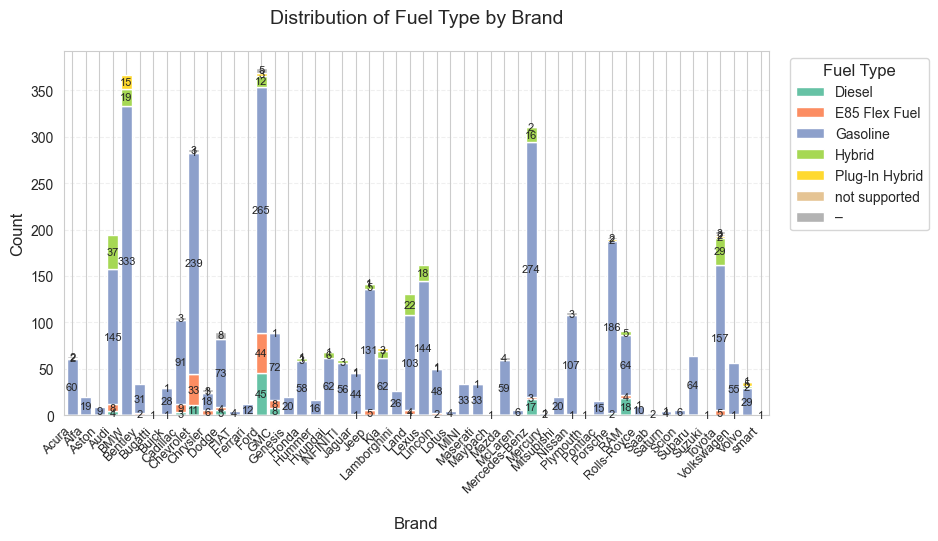

In [19]:
# Create the cross tabulation
cross_tab = pd.crosstab(df['brand'], df['fuel_type'])

# Create figure with more height and width
plt.figure(figsize=(20, 10))

# Create the stacked bar plot
ax = cross_tab.plot(kind='bar', 
                   stacked=True, 
                   width=0.8,
                   colormap='Set2')

# Customize the plot
plt.title('Distribution of Fuel Type by Brand', pad=20, fontsize=14)
plt.xlabel('Brand', fontsize=12, labelpad=15)  # Added labelpad for spacing
plt.ylabel('Count', fontsize=12)

# Improve tick labels with more spacing and clearer formatting
plt.xticks(rotation=45, ha='right', fontsize=9)
ax.set_xticklabels(ax.get_xticklabels(), linespacing=1.2)  # Increase spacing between wrapped labels

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.3, zorder=0)

# Enhance legend with better positioning
plt.legend(title='Fuel Type', 
          bbox_to_anchor=(1.02, 1),  # Slightly adjusted position
          loc='upper left',
          fontsize=10,
          title_fontsize=12)

# Add value labels on the bars
for c in ax.containers:
    # Only show labels for values > 0
    ax.bar_label(c, label_type='center', fmt=lambda x: int(x) if x > 0 else '', 
                fontsize=8)

# Adjust subplot parameters
plt.subplots_adjust(bottom=0.2)  # More space at bottom for labels

# Use tight_layout with adjusted bounds
plt.tight_layout(rect=[0, 0.03, 0.95, 0.95])  # [left, bottom, right, top]

plt.show()

In [20]:
print(df['fuel_type'].unique())

['E85 Flex Fuel' 'Gasoline' 'Hybrid' nan 'Diesel' 'Plug-In Hybrid' '–'
 'not supported']


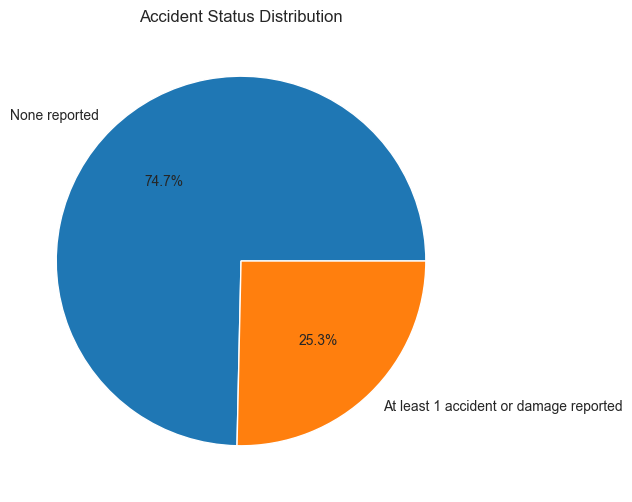

In [21]:
df['accident'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Accident Status Distribution')
plt.ylabel('')
plt.show()


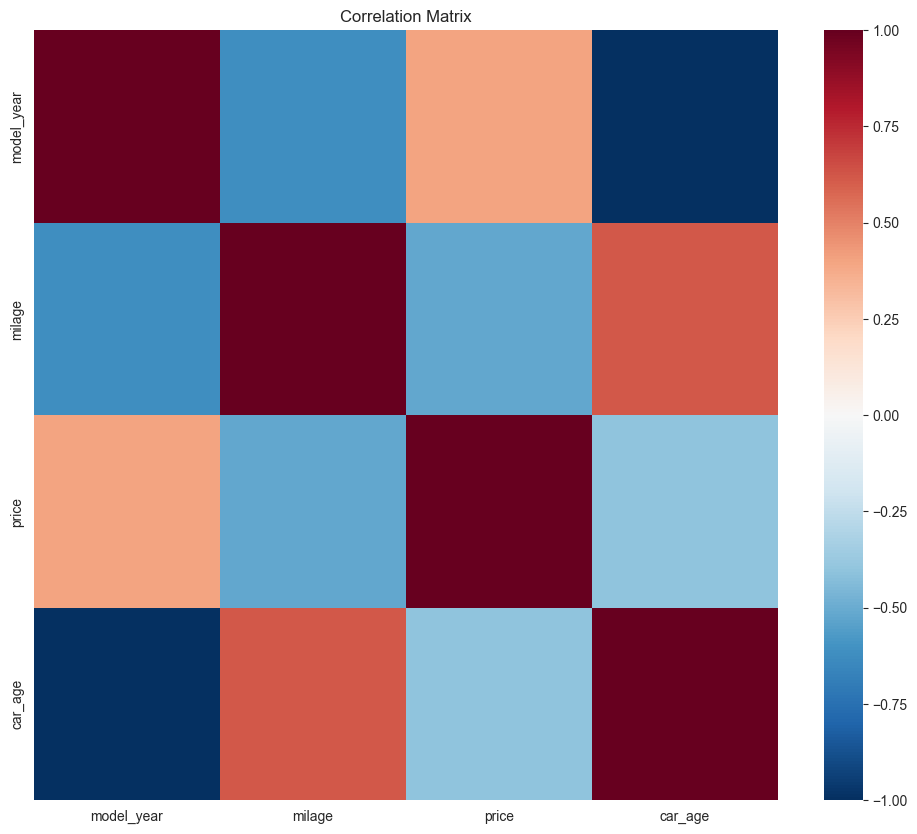


Correlation of Features with Price:
price         1.000000
model_year    0.405425
car_age      -0.405425
milage       -0.519143
Name: price, dtype: float64

Variance Inflation Factors:
      feature       VIF
0  model_year  3.173371
1      milage  1.635276
2     car_age  4.791143


In [22]:
# Correlation matrix
num_cols = df.select_dtypes(include=[np.number]).columns
# Ensure all categoricals (like transmission_group, brand_tier) are dummy encoded:
if 'transmission_group' in df.columns:
    df = pd.get_dummies(df, columns=['transmission_group'], drop_first=True)

if 'brand_tier' in df.columns:
    df = pd.get_dummies(df, columns=['brand_tier'], drop_first=True)

corr_matrix = df[num_cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=False, cmap='RdBu_r', center=0)
plt.title('Correlation Matrix')
plt.show()

# Price correlation if applicable
if 'price' in df.columns:
    price_corr = corr_matrix['price'].sort_values(ascending=False)
    print("\nCorrelation of Features with Price:")
    print(price_corr)

# Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[num_cols].drop(['price','price_log'], axis=1, errors='ignore')  
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors:")
print(vif_data)

# Based on VIF and correlation, drop or combine features as needed
# (User decision on which to drop)


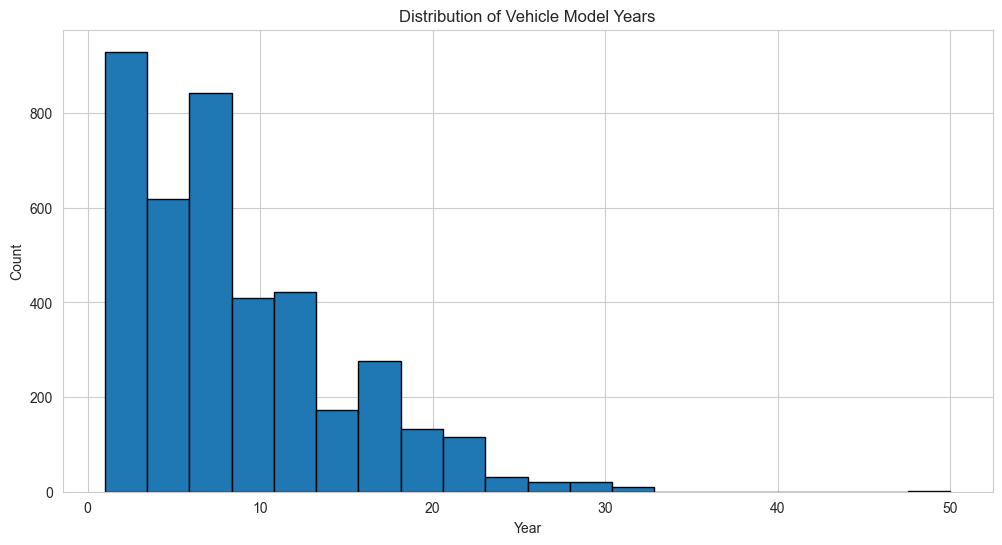

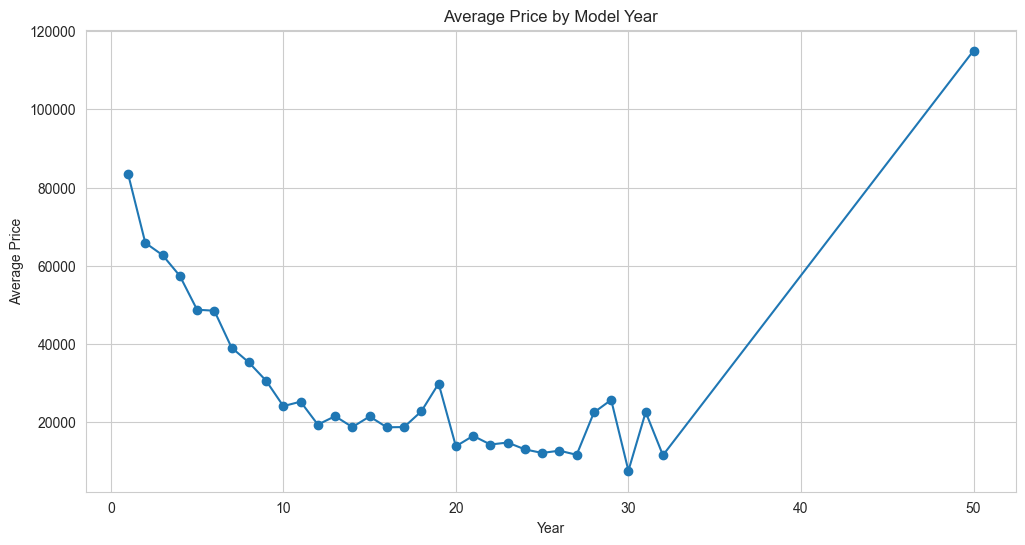

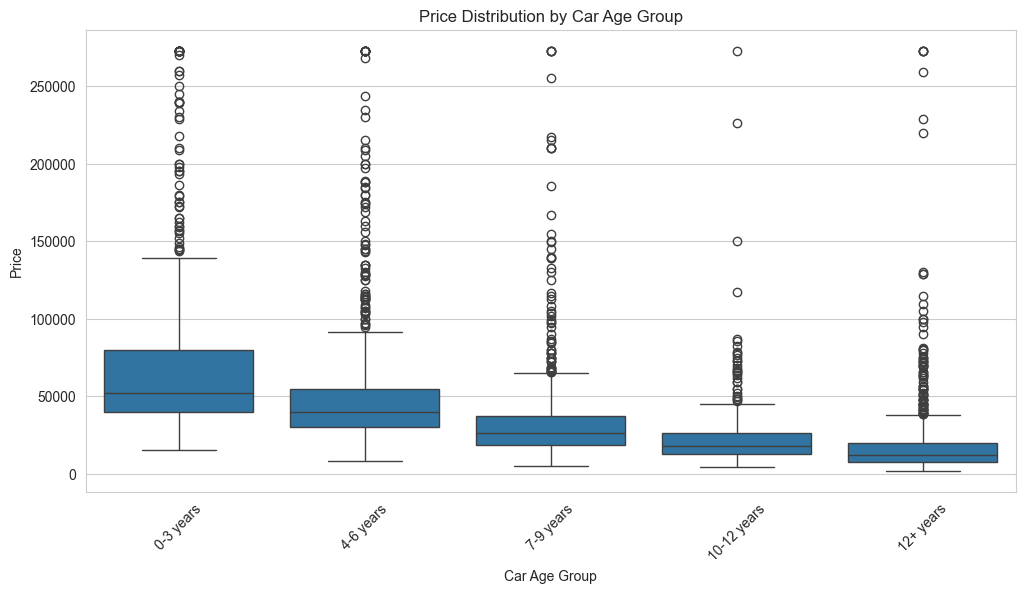


Summary Statistics by Age Group:
                price                     milage
                 mean       std count       mean
age_group                                       
0-3 years    68949.32  49815.68   930   17827.46
4-6 years    51635.78  40718.93   934   43873.19
7-9 years    35136.97  33122.10   755   76052.80
10-12 years  23053.50  21646.88   480   91525.55
12+ years    19492.87  27148.15   904  109624.21

Correlations with Car Age:
car_age    1.000000
milage     0.623284
price     -0.405425
Name: car_age, dtype: float64


/var/folders/4c/xwnhl2w95z7gvrgl4bz_wfhr0000gn/T/ipykernel_62252/4185416759.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = df.groupby('age_group').agg({


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Calculate vehicle age
current_year = datetime.now().year

# Create age groups
df['age_group'] = pd.cut(df['car_age'], 
                        bins=[0, 3, 6, 9, 12, float('inf')],
                        labels=['0-3 years', '4-6 years', '7-9 years', '10-12 years', '12+ years'])

# 1. Distribution of Model Years
plt.figure(figsize=(12, 6))
plt.hist(df['car_age'], bins=20, edgecolor='black')
plt.title('Distribution of Vehicle Model Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# 2. Average Price by Model Year
plt.figure(figsize=(12, 6))
year_price = df.groupby('car_age')['price'].mean()
plt.plot(year_price.index, year_price.values, marker='o')
plt.title('Average Price by Model Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

# 3. Box Plot of Prices by Age Group
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_group', y='price', data=df)
plt.title('Price Distribution by Car Age Group')
plt.xlabel('Car Age Group')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


# 5. Summary Statistics by Age Group
age_group_stats = df.groupby('age_group').agg({
    'price': ['mean', 'std', 'count'],
    'milage': 'mean',
}).round(2)

print("\nSummary Statistics by Age Group:")
print(age_group_stats)

# 6. Correlation between Age and Other Features
age_correlations = df[['car_age', 'price', 'milage']].corr()['car_age'].sort_values(ascending=False)

print("\nCorrelations with Car Age:")
print(age_correlations)

# Step 4: Data Cleaning & Preprocessing
- Handle missing values by imputation.
- Ensure numeric columns are properly typed (e.g., price, mileage).
- Address and remove invalid data points if necessary.

**Validation Criteria:**
- No or minimal missing values remain after imputation.
- All numeric columns converted to appropriate numeric types.


In [24]:
# Drop the 'clean_title' column
if 'clean_title' in df.columns:
    df = df.drop(columns=['clean_title'])

# Remove Bugatti from the dataset
df = df[df['brand'] != 'Bugatti']

# Remove cars with car_age of 0
if 'car_age' in df.columns:
    df = df[df['car_age'] != 0]

# Verify the operations
print("Columns in DataFrame after dropping 'clean_title':", df.columns)
print(f"Number of rows after removing Bugatti and car_age = 0: {df.shape[0]}")


Columns in DataFrame after dropping 'clean_title': Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'price', 'car_age',
       'age_group'],
      dtype='object')
Number of rows after removing Bugatti and car_age = 0: 4002


In [25]:
import spacy
from sklearn.cluster import KMeans
import numpy as np

# Load the spaCy model for embeddings
nlp = spacy.load('en_core_web_md')


In [26]:
colors = df['ext_col'].unique()

color_vectors = []
valid_colors = []  # To keep track of colors that have valid embeddings
for color in colors:
    doc = nlp(color.lower())
    # Filter tokens that have vectors (some punctuation or unknown words may have no vectors)
    token_vectors = [token.vector for token in doc if token.has_vector]
    if len(token_vectors) > 0:
        vector = np.mean(token_vectors, axis=0)  # Average embedding for the color name
        color_vectors.append(vector)
        valid_colors.append(color)


In [27]:
k = 10 # You can experiment with values like 5, 10, 15, etc.
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(color_vectors)


In [28]:
from collections import defaultdict

cluster_dict = defaultdict(list)
for col_name, lbl in zip(valid_colors, labels):
    cluster_dict[lbl].append(col_name)

for cluster_id, col_list in cluster_dict.items():
    print(f"Cluster {cluster_id}:")
    print(col_list)
    print("\n")


Cluster 3:
['Black', 'Ultra Black', 'Vik Black', 'Black Clearcoat', 'Mythos Black', 'Black Cherry', 'BLACK', 'Beluga Black', 'Ebony Black', 'Midnight Black', 'Santorin Black', 'Brilliant Black', 'Twilight Black', 'Diamond Black', 'Santorini Black', 'Onyx Black', 'Tan', 'Magnetic Black', 'Shadow Black', 'Aurora Black', 'Black Raven', 'Phantom Black', 'Crystal Black', 'Super Black']


Cluster 0:
['Moonlight Cloud', 'Blue', 'Caspian Blue', 'Horizon Blue', 'Apex Blue', 'Patriot Blue Pearlcoat', 'BLUE', 'Hydro Blue Pearlcoat', 'Navarra Blue', 'Pacific Blue', 'Navarre Blue', 'Vega Blue', 'Bayside Blue', 'Fountain Blue', 'Blue Caelum', 'China Blue', 'Kinetic Blue']


Cluster 2:
['Glacier White Metallic', 'Fuji White', 'Yellow', 'White', 'Alpine White', 'Summit White', 'Bright White Clearcoat', 'Lunare White Metallic', 'Yulong White', 'Ibis White', 'Quartz White', 'Pure White', 'Snow White Pearl', 'MANUFAKTUR Diamond White Bright', 'Pearl White', 'Oxford White', 'Glacier White', 'White Clearco

In [29]:
color_to_cluster = {c: l for c, l in zip(valid_colors, labels)}

# For colors that didn't produce embeddings (extremely unlikely, but just in case), assign them to 'Other' or a default cluster
df['ext_col_cluster'] = df['ext_col'].apply(lambda x: color_to_cluster.get(x, 'Other'))


                   ext_col ext_col_cluster     ext_col_cluster_named
0                    Black               3              Black Shades
1          Moonlight Cloud               0               Blue Shades
2                     Blue               0               Blue Shades
3                    Black               3              Black Shades
4   Glacier White Metallic               2   White & Light Metallics
5                   Silver               7  Silver, Gold & Metallics
6                     Blue               0               Blue Shades
7                    Green               4       Red and Earth Tones
8                    Black               3              Black Shades
9                    Black               3              Black Shades
10              Fuji White               2   White & Light Metallics
11                  Silver               7  Silver, Gold & Metallics
12                  Yellow               2   White & Light Metallics
13                   Black        

/var/folders/4c/xwnhl2w95z7gvrgl4bz_wfhr0000gn/T/ipykernel_62252/414162373.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='ext_col_cluster_named', data=df, order=cluster_names.values(), palette='viridis')


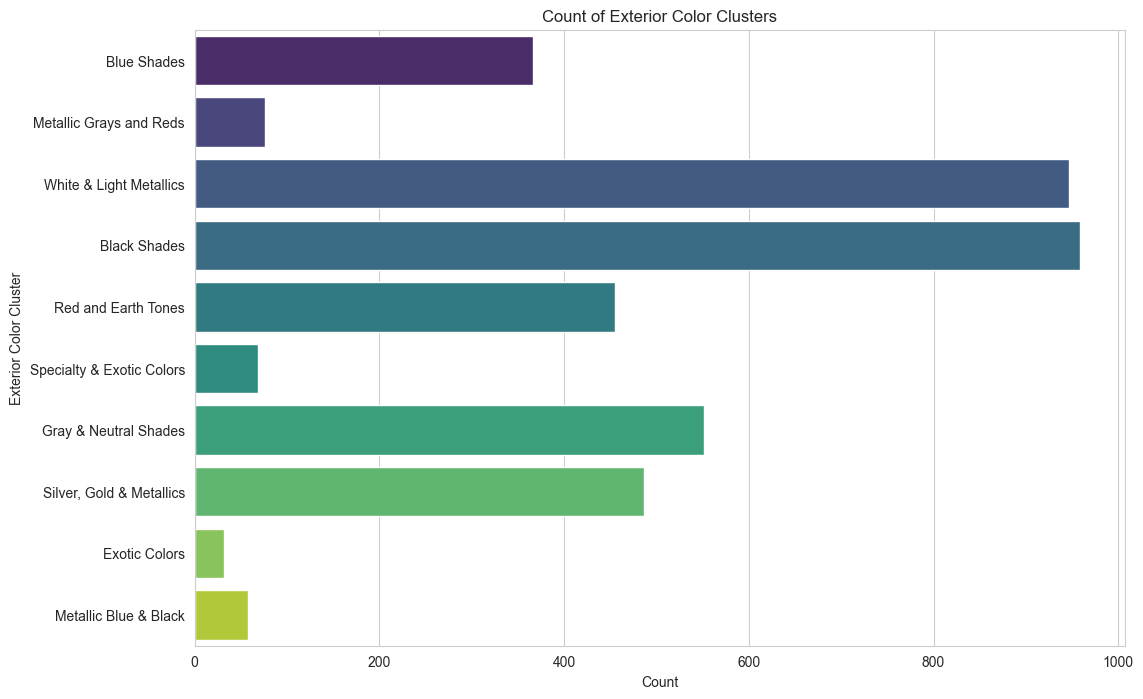

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the cluster names based on the suggestions
cluster_names = {
    0: "Blue Shades",
    1: "Metallic Grays and Reds",
    2: "White & Light Metallics",
    3: "Black Shades",
    4: "Red and Earth Tones",
    5: "Specialty & Exotic Colors",
    6: "Gray & Neutral Shades",
    7: "Silver, Gold & Metallics",
    8: "Exotic Colors",
    9: "Metallic Blue & Black"
}

# Assign the cluster names to a new column
df['ext_col_cluster_named'] = df['ext_col_cluster'].map(cluster_names)

# Verify the new column
print(df[['ext_col', 'ext_col_cluster', 'ext_col_cluster_named']].head(20))

# Visualize the distribution of the new clusters
plt.figure(figsize=(12,8))
sns.countplot(y='ext_col_cluster_named', data=df, order=cluster_names.values(), palette='viridis')
plt.title('Count of Exterior Color Clusters')
plt.xlabel('Count')
plt.ylabel('Exterior Color Cluster')
plt.show()


In [31]:
int_colors = df['int_col'].unique()

color_vectors = []
valid_colors = []  # To keep track of colors that have valid embeddings
for color in int_colors:
    doc = nlp(color.lower())
    # Filter tokens that have vectors (some punctuation or unknown words may have no vectors)
    token_vectors = [token.vector for token in doc if token.has_vector]
    if len(token_vectors) > 0:
        vector = np.mean(token_vectors, axis=0)  # Average embedding for the color name
        color_vectors.append(vector)
        valid_colors.append(color)
        
k = 4 # You can experiment with values like 5, 10, 15, etc.
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(color_vectors)

from collections import defaultdict

cluster_dict = defaultdict(list)
for col_name, lbl in zip(valid_colors, labels):
    cluster_dict[lbl].append(col_name)

for cluster_id, col_list in cluster_dict.items():
    print(f"Cluster {cluster_id}:")
    print(col_list)
    print("\n")

Cluster 1:
['Black', 'Ebony.', 'Pimento / Ebony', '–', 'Jet Black', 'Blue', 'Canberra Beige/Black', 'Ivory / Ebony', 'Black / Express Red', 'Obsidian Black', 'Ebony', 'Tan/Ebony', 'Sahara Tan', 'BLACK', 'Black Onyx', 'Titan Black', 'Silver', 'Macchiato Beige/Black', 'Gold', 'Black/Red', 'Charles Blue', 'Global Black', 'Titan Black / Quarzit', 'Black / Saddle', 'Ebony / Pimento', 'Tan', 'Mistral Gray / Raven', 'Satin Black', 'Pimento Red w/Ebony', 'Ebony Black', 'Diesel Gray / Black', 'Charcoal Black', 'Tan/Ebony/Ebony', 'Amber', 'Black / Brown', 'Sakhir Orange/Black', 'AMG Black', 'Light Titanium', 'Platinum', 'Ebony/Light Oyster Stitch', 'Red/Black', 'Rhapsody Blue', 'Light Platinum / Jet Black', 'Black w/Red Stitching', 'Black/Saddle Brown', 'Black/Gun Metal', 'Oyster/Black', 'Red / Black', 'Ebony / Ebony Accents', 'Carbon Black', 'Sport', 'Black/Graphite', 'Gray w/Blue Bolsters', 'Black / Gray', 'Black / Graphite']


Cluster 2:
['Gray', 'Beige', 'Light Gray', 'Anthracite', 'Silk Bei

In [32]:
color_to_cluster = {c: l for c, l in zip(valid_colors, labels)}

# For colors that didn't produce embeddings (extremely unlikely, but just in case), assign them to 'Other' or a default cluster
df['int_col_cluster'] = df['int_col'].apply(lambda x: color_to_cluster.get(x, 'Other'))

            int_col  int_col_cluster     int_col_cluster_named
0             Black                1  Black & Metallic Accents
1              Gray                2     Gray & Beige Neutrals
2             Black                1  Black & Metallic Accents
3             Black                1  Black & Metallic Accents
4             Black                1  Black & Metallic Accents
5            Ebony.                1  Black & Metallic Accents
6             Black                1  Black & Metallic Accents
7             Green                3     Vibrant & Earth Tones
8             Black                1  Black & Metallic Accents
9             Black                1  Black & Metallic Accents
10  Pimento / Ebony                1  Black & Metallic Accents
11            Black                1  Black & Metallic Accents
12            Black                1  Black & Metallic Accents
13            Brown                3     Vibrant & Earth Tones
14            Black                1  Black & Metallic 

/var/folders/4c/xwnhl2w95z7gvrgl4bz_wfhr0000gn/T/ipykernel_62252/2598714795.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='int_col_cluster_named', data=df, order=int_cluster_names.values(), palette='viridis')


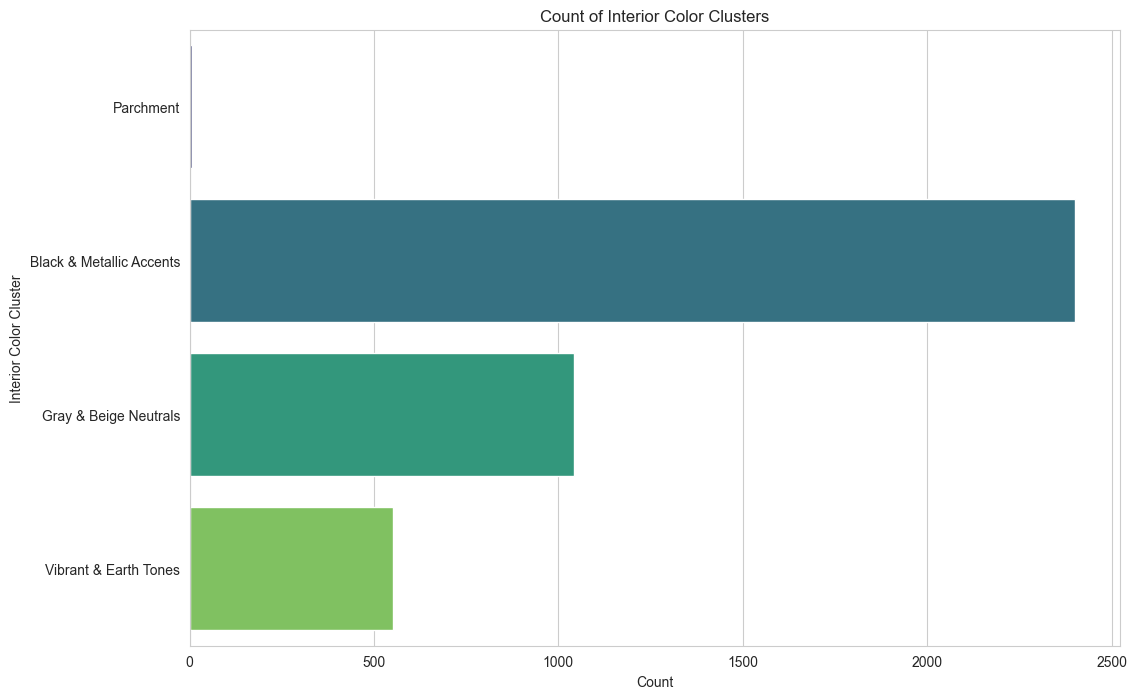

In [33]:

int_cluster_names = {
    0: "Parchment",
    1: "Black & Metallic Accents",
    2: "Gray & Beige Neutrals",
    3: "Vibrant & Earth Tones",
}
# Assign the cluster names to a new column
df['int_col_cluster_named'] = df['int_col_cluster'].map(int_cluster_names)

# Verify the new column
print(df[['int_col', 'int_col_cluster', 'int_col_cluster_named']].head(20))

# Visualize the distribution of the new clusters
plt.figure(figsize=(12,8))
sns.countplot(y='int_col_cluster_named', data=df, order=int_cluster_names.values(), palette='viridis')
plt.title('Count of Interior Color Clusters')
plt.xlabel('Count')
plt.ylabel('Interior Color Cluster')
plt.show()


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Assuming 'df' is your DataFrame loaded earlier

# Standardize brand names (e.g., remove extra spaces, convert to title case)
df['brand'] = df['brand'].str.strip().str.title()


# Verify unique brands after cleaning
print("Unique Brands After Cleaning:", df['brand'].unique())

import spacy

nlp = spacy.load('en_core_web_md')  # Ensure this model is installed

unique_brands = df['brand'].unique()

brand_vectors = []
valid_brands = []

for brand in unique_brands:
    doc = nlp(brand.lower())
    token_vectors = [token.vector for token in doc if token.has_vector]
    if len(token_vectors) > 0:
        vector = np.mean(token_vectors, axis=0)  # Average embedding for the color name
        brand_vectors.append(vector)
        valid_brands.append(brand)

# Convert to numpy array
brand_vectors = np.array(brand_vectors)



Unique Brands After Cleaning: ['Ford' 'Hyundai' 'Lexus' 'Infiniti' 'Audi' 'Acura' 'Bmw' 'Tesla' 'Land'
 'Aston' 'Toyota' 'Lincoln' 'Jaguar' 'Mercedes-Benz' 'Dodge' 'Nissan'
 'Genesis' 'Chevrolet' 'Kia' 'Jeep' 'Bentley' 'Honda' 'Lucid' 'Mini'
 'Porsche' 'Hummer' 'Chrysler' 'Volvo' 'Cadillac' 'Lamborghini' 'Maserati'
 'Volkswagen' 'Subaru' 'Rivian' 'Gmc' 'Ram' 'Alfa' 'Ferrari' 'Scion'
 'Mitsubishi' 'Mazda' 'Saturn' 'Polestar' 'Rolls-Royce' 'Mclaren' 'Buick'
 'Lotus' 'Pontiac' 'Fiat' 'Karma' 'Saab' 'Mercury' 'Plymouth' 'Smart'
 'Maybach' 'Suzuki']


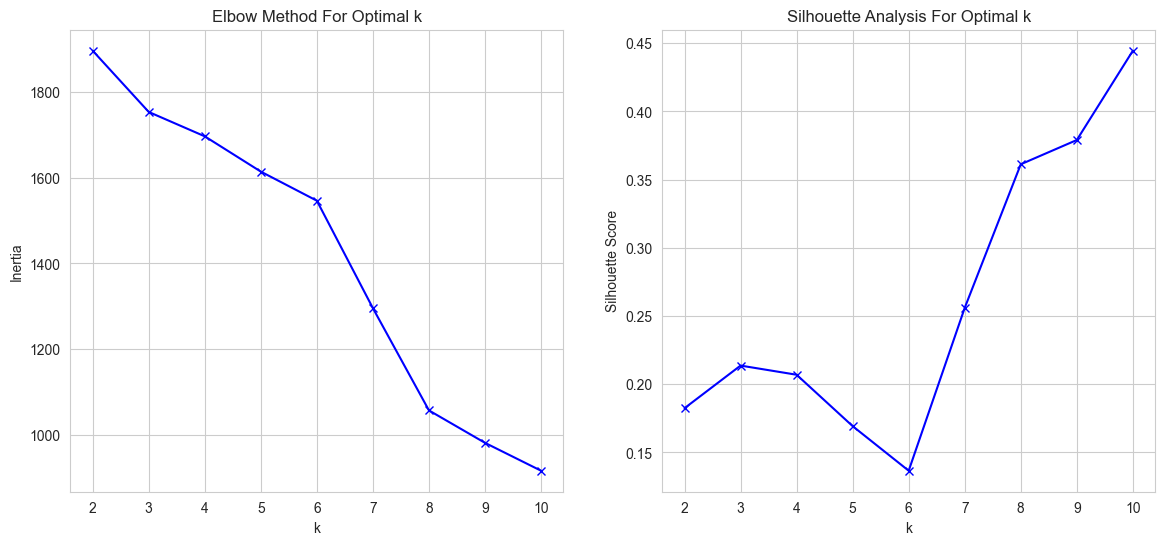

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define the feature matrix for clustering
# Option A: Using NLP embeddings
brand_embeddings_df = pd.DataFrame(brand_vectors, index=valid_brands)
brand_embeddings_df = brand_embeddings_df.reset_index().rename(columns={'index': 'brand'})
X_embeddings = brand_embeddings_df.drop('brand', axis=1).values



# Function to perform Elbow and Silhouette Analysis
def determine_optimal_k(X, max_k=15):
    inertia = []
    silhouette = []
    K = range(2, max_k+1)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(X, labels)
        silhouette.append(silhouette_avg)
    
    # Plot Elbow Method
    plt.figure(figsize=(14,6))
    
    plt.subplot(1,2,1)
    plt.plot(K, inertia, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.title('Elbow Method For Optimal k')
    
    # Plot Silhouette Scores
    plt.subplot(1,2,2)
    plt.plot(K, silhouette, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Analysis For Optimal k')
    
    plt.show()
    
determine_optimal_k(X_embeddings, max_k=10)




In [36]:
# Perform clustering with the chosk = 4 # You can experiment with values like 5, 10, 15, etc.
k = 13
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_embeddings)

from collections import defaultdict

cluster_dict = defaultdict(list)
for col_name, lbl in zip(valid_brands, labels):
    cluster_dict[lbl].append(col_name)

for cluster_id, col_list in cluster_dict.items():
    print(f"Cluster {cluster_id}:")
    print(col_list)
    print("\n")


Cluster 0:
['Ford', 'Aston', 'Genesis', 'Bentley', 'Mclaren']


Cluster 9:
['Hyundai', 'Suzuki']


Cluster 6:
['Lexus', 'Toyota', 'Lincoln', 'Nissan', 'Chevrolet', 'Jeep', 'Chrysler', 'Volkswagen', 'Subaru', 'Plymouth']


Cluster 2:
['Infiniti', 'Hummer']


Cluster 4:
['Audi', 'Bmw', 'Honda']


Cluster 5:
['Acura', 'Gmc', 'Scion', 'Mazda', 'Buick', 'Saab']


Cluster 10:
['Tesla', 'Land', 'Mercedes-Benz', 'Dodge', 'Kia', 'Mini', 'Porsche', 'Lamborghini', 'Maserati', 'Ram', 'Ferrari', 'Polestar', 'Rolls-Royce', 'Lotus', 'Fiat', 'Karma', 'Maybach']


Cluster 8:
['Jaguar', 'Mitsubishi']


Cluster 1:
['Lucid', 'Smart']


Cluster 3:
['Volvo', 'Cadillac', 'Pontiac']


Cluster 7:
['Alfa']


Cluster 12:
['Saturn']


Cluster 11:
['Mercury']




In [37]:
# Drop original 'ext_col' and 'int_col' as they are now represented by clusters
df = df.drop(columns=['ext_col', 'int_col'])

df = pd.get_dummies(df, columns=['ext_col_cluster_named', 'int_col_cluster_named'], drop_first=True)

In [38]:
df['accident_binary'] = df['accident'].apply(lambda x: 0 if x == 'None reported' else 1)
print(df['accident_binary'].value_counts())


accident_binary
0    2903
1    1099
Name: count, dtype: int64


In [39]:
# Final mapping for transmissions
transmission_groups = {
    # Automatic Transmissions
    'A/T': 'Automatic',
    '8-Speed A/T': 'Automatic',
    '6-Speed A/T': 'Automatic',
    '7-Speed A/T': 'Automatic',
    '10-Speed A/T': 'Automatic',
    '9-Speed A/T': 'Automatic',
    '5-Speed A/T': 'Automatic',
    '1-Speed A/T': 'Automatic',
    '2-Speed A/T': 'Automatic',
    '2-Speed Automatic': 'Automatic',
    '8-Speed Automatic with Auto-Shift': 'Automatic',
    '4-Speed A/T': 'Automatic',
    '6-Speed Automatic': 'Automatic',
    '8-Speed Automatic': 'Automatic',
    '10-Speed Automatic': 'Automatic',
    '9-Speed Automatic': 'Automatic',
    '5-Speed Automatic': 'Automatic',
    '4-Speed Automatic': 'Automatic',
    '8-SPEED A/T': 'Automatic',
    '1-Speed Automatic': 'Automatic',
    '10-Speed Automatic with Overdrive': 'Automatic',
    '6-Speed Automatic with Auto-Shift': 'Automatic',
    '7-Speed Automatic': 'Automatic',
    'Automatic, 8-Spd PDK Dual-Clutch': 'Automatic',
    '7-Speed Automatic with Auto-Shift': 'Automatic',
    '7-Speed DCT Automatic': 'Automatic',
    'Automatic, 8-Spd': 'Automatic',
    'Automatic, 9-Spd 9G-Tronic': 'Automatic',
    'Automatic, 7-Spd S tronic Dual-Clutch': 'Automatic',
    'Automatic, 10-Spd': 'Automatic',
    'Automatic CVT': 'Automatic',
    '8-SPEED AT': 'Automatic',
    'Automatic, 8-Spd Dual-Clutch': 'Automatic',
    'Automatic, 8-Spd M STEPTRONIC w/Drivelogic, Sport & Manual Modes': 'Automatic',
    'Automatic, 8-Spd Sport w/Sport & Manual Modes': 'Automatic',
    'Auto, 6-Spd w/CmdShft': 'Automatic',
    '9-Speed Automatic with Auto-Shift': 'Automatic',
    'Transmission w/Dual Shift Mode': 'Automatic',
    '6-Speed Electronically Controlled Automatic with O': 'Automatic',
    
    # Manual Transmissions
    'M/T': 'Manual',
    '6-Speed M/T': 'Manual',
    '5-Speed M/T': 'Manual',
    '7-Speed M/T': 'Manual',
    '8-Speed M/T': 'Manual',
    '6-Speed Manual': 'Manual',
    'Manual': 'Manual',
    'Manual, 6-Spd': 'Manual',
    '6 Speed Mt': 'Manual',
    '6 Speed At/Mt': 'Manual',
    '7-Speed Manual': 'Manual',
    '8-Speed Manual': 'Manual',
    '8-Speed Manual': 'Manual',


    # CVT
    'CVT': 'CVT',
    'CVT Transmission': 'CVT',
    'CVT-F': 'CVT',

    # Overdrive
    'Overdrive': 'Overdrive',
    'Transmission Overdrive Switch': 'Overdrive',

    # Variable
    'Variable': 'Variable',

    # Unknown or Other
    'F': 'Unknown',
    'SCHEDULED FOR OR IN PRODUCTION': 'Unknown',
    '–': 'Unknown',
    '2': 'Unknown',
    '7-Speed': 'Unknown',
    '6-Speed': 'Unknown',
    'Single-Speed Fixed Gear': 'Unknown'
}

# Apply the mapping
df['transmission_group'] = df['transmission'].replace(transmission_groups)

# Remove rows with 'Unknown' or invalid categories
df = df[df['transmission_group'] != 'Unknown']

# Verify the unique values in 'transmission_group'
print("Unique values in 'transmission_group':")
print(df['transmission_group'].value_counts())

# One-hot encode the transmission_group column
transmission_dummies = pd.get_dummies(df['transmission_group'], prefix='transmission', drop_first=True)

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, transmission_dummies], axis=1)

# Drop the original 'transmission_group' column if no longer needed
df = df.drop(columns=['transmission'])

# Verify the updated DataFrame
print("\nColumns after one-hot encoding:")
print(df.columns)


Unique values in 'transmission_group':
transmission_group
Automatic    3541
Manual        374
CVT            63
Overdrive       7
Variable        4
Name: count, dtype: int64

Columns after one-hot encoding:
Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'accident', 'price', 'car_age', 'age_group', 'ext_col_cluster',
       'int_col_cluster', 'ext_col_cluster_named_Blue Shades',
       'ext_col_cluster_named_Exotic Colors',
       'ext_col_cluster_named_Gray & Neutral Shades',
       'ext_col_cluster_named_Metallic Blue & Black',
       'ext_col_cluster_named_Metallic Grays and Reds',
       'ext_col_cluster_named_Red and Earth Tones',
       'ext_col_cluster_named_Silver, Gold & Metallics',
       'ext_col_cluster_named_Specialty & Exotic Colors',
       'ext_col_cluster_named_White & Light Metallics',
       'int_col_cluster_named_Gray & Beige Neutrals',
       'int_col_cluster_named_Parchment',
       'int_col_cluster_named_Vibrant & Earth Tones', 'acc

In [40]:
# Print unique transmission groups and their counts
print("\nUnique Transmission Groups and Counts:")
print("=" * 40)
print(df['transmission_group'].value_counts())

# Print total number of unique groups
n_groups = df['transmission_group'].nunique()
print(f"\nTotal number of unique transmission groups: {n_groups}")

# Optional: Show percentage distribution
print("\nPercentage Distribution:")
print("=" * 40)
print(df['transmission_group'].value_counts(normalize=True).round(4) * 100, "%")


Unique Transmission Groups and Counts:
transmission_group
Automatic    3541
Manual        374
CVT            63
Overdrive       7
Variable        4
Name: count, dtype: int64

Total number of unique transmission groups: 5

Percentage Distribution:
transmission_group
Automatic    88.77
Manual        9.38
CVT           1.58
Overdrive     0.18
Variable      0.10
Name: proportion, dtype: float64 %


# Step 5: Feature Engineering & Transformation
- Extract features from text fields (e.g., horsepower, engine_size, cylinders from 'engine').
- Transform skewed variables (e.g., log-transform price, mileage).
- Group rare categories, and optionally apply dimensionality reduction (PCA).

**Validation Criteria:**
- Skewness reduced for heavily skewed features.
- Rare categories combined for more stable modeling.


In [41]:
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

# Example: Extract engine features if present
if 'engine' in df.columns:
    df['horsepower'] = df['engine'].str.extract(r'(\d{2,4}\.?\d*)HP', expand=False).astype(float)
    df['engine_size'] = df['engine'].str.extract(r'(\d\.\d+)L', expand=False).astype(float)
    df['cylinders'] = df['engine'].str.extract(r'(\d+)\s*Cylinder', expand=False).astype(float)
    
    
    df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
    df['engine_size'] = pd.to_numeric(df['engine_size'], errors='coerce')
    df['cylinders'] = pd.to_numeric(df['cylinders'], errors='coerce')
    
    # Define the grouping columns
group_cols = ['brand', 'model']

# Function to impute missing values with group median
def impute_group_median(df, feature, group_cols):
    return df.groupby(group_cols)[feature].transform(lambda x: x.fillna(x.median()))

# Impute horsepower
df['horsepower'] = impute_group_median(df, 'horsepower', group_cols)

# Impute engine_size
df['engine_size'] = impute_group_median(df, 'engine_size', group_cols)

# Impute cylinders
df['cylinders'] = impute_group_median(df, 'cylinders', group_cols)

# For any remaining missing values, impute with overall median
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())
df['engine_size'] = df['engine_size'].fillna(df['engine_size'].median())
df['cylinders'] = df['cylinders'].fillna(df['cylinders'].median())

print("Missing values after imputation:")
print(df[['horsepower', 'engine_size', 'cylinders']].isnull().sum())


Missing values after imputation:
horsepower     0
engine_size    0
cylinders      0
dtype: int64


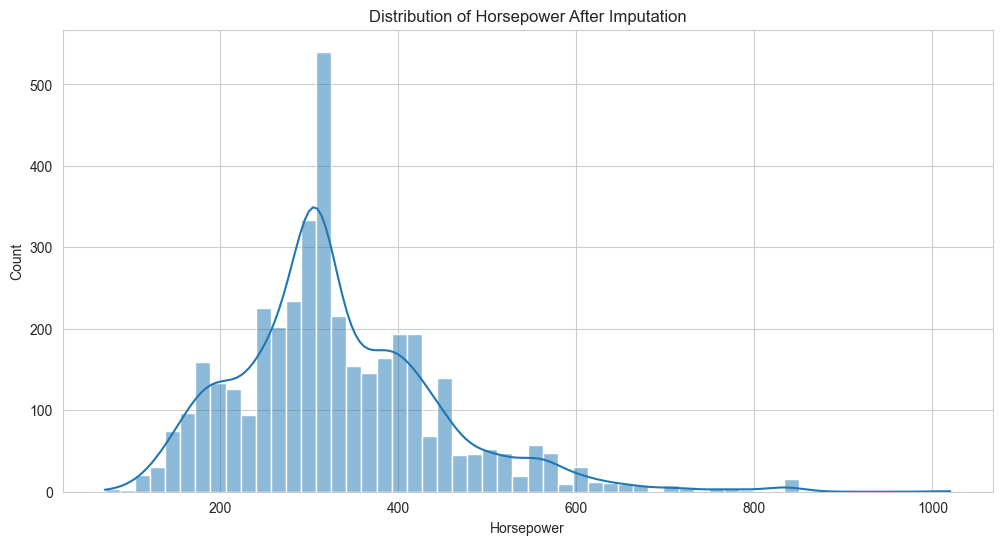

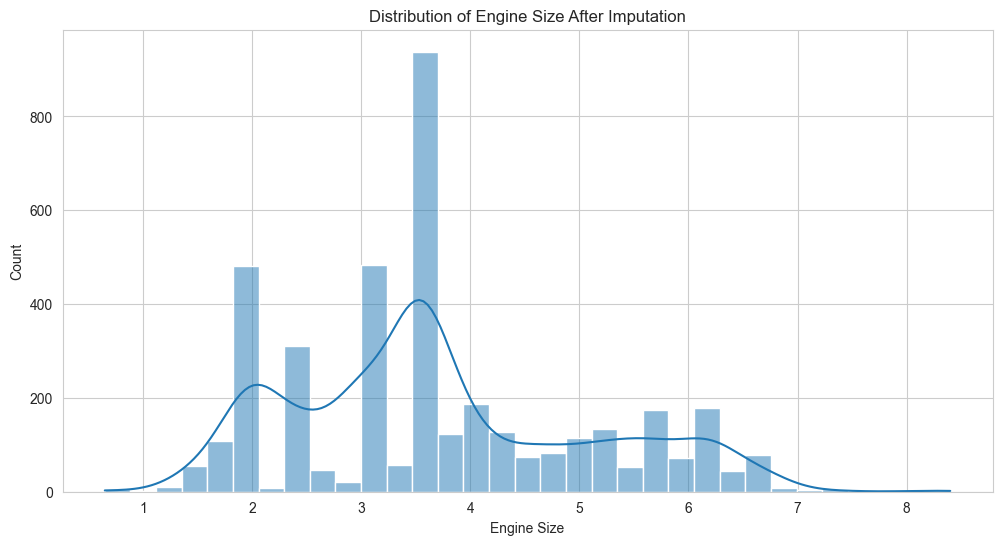

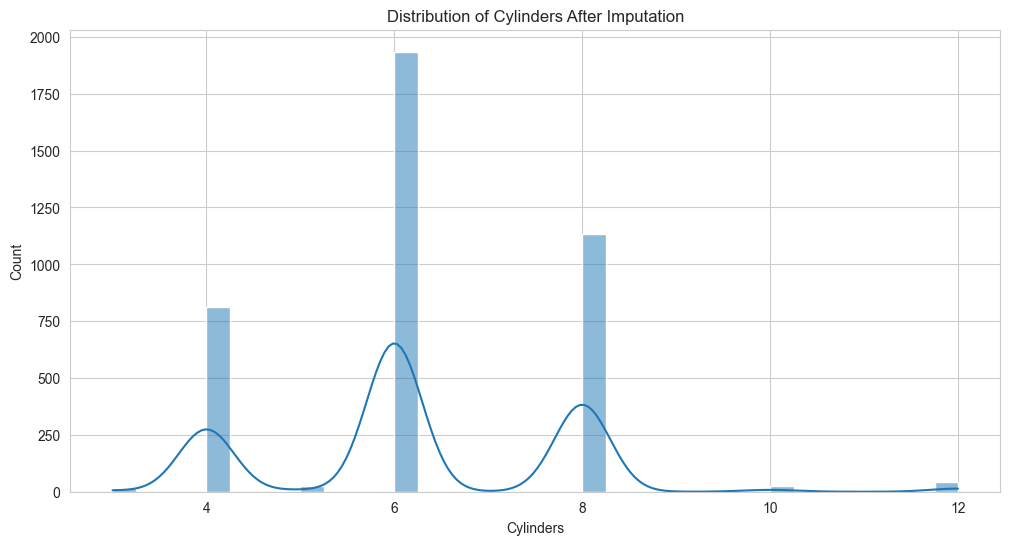

In [42]:
# Example: Compare distributions before and after imputation for horsepower
plt.figure(figsize=(12,6))
sns.histplot(df['horsepower'], kde=True)
plt.title('Distribution of Horsepower After Imputation')
plt.xlabel('Horsepower')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(df['engine_size'], kde=True)
plt.title('Distribution of Engine Size After Imputation')
plt.xlabel('Engine Size')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(df['cylinders'], kde=True)
plt.title('Distribution of Cylinders After Imputation')
plt.xlabel('Cylinders')
plt.ylabel('Count')
plt.show()



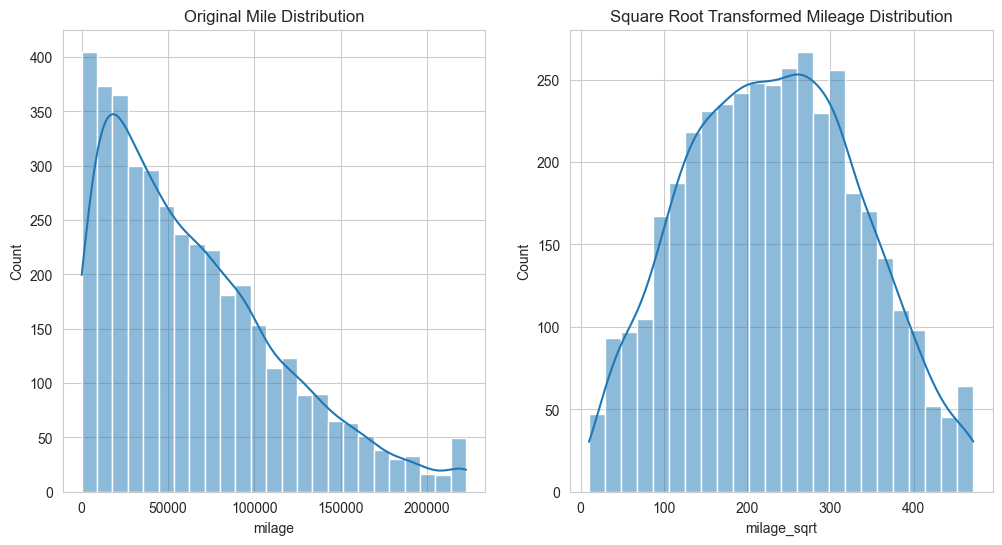

Skewness before transform: 0.9361803924204534
Skewness after transform: 0.09187535410735281


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Log-transform price and mileage
df['milage_sqrt'] = np.sqrt(df['milage'])

# Check distributions before and after
fig, axes = plt.subplots(1,2, figsize=(12,6))
sns.histplot(df['milage'], ax=axes[0], kde=True)
axes[0].set_title('Original Mile Distribution')
sns.histplot(df['milage_sqrt'], ax=axes[1], kde=True)
axes[1].set_title('Square Root Transformed Mileage Distribution')
plt.show()

print("Skewness before transform:", df['milage'].skew())
print("Skewness after transform:", df['milage_sqrt'].skew())

if 'milage' in df.columns:
    df = df.drop(columns=['milage'])

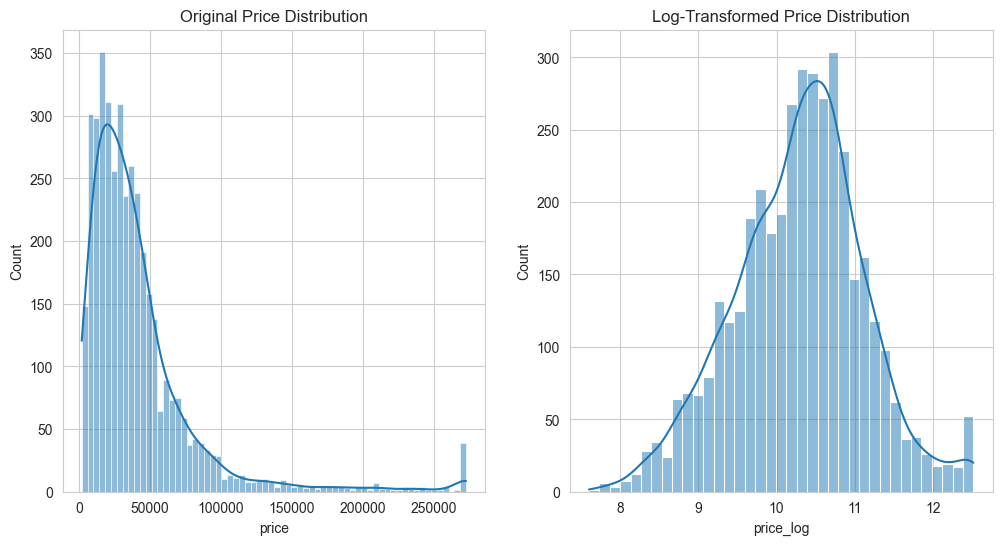

Skewness before transform: 3.1102367391176595
Skewness after transform: -0.06720017983197575


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Log-transform price and mileage
df['price_log'] = np.log1p(df['price'])

# Check distributions before and after
fig, axes = plt.subplots(1,2, figsize=(12,6))
sns.histplot(df['price'], ax=axes[0], kde=True)
axes[0].set_title('Original Price Distribution')
sns.histplot(df['price_log'], ax=axes[1], kde=True)
axes[1].set_title('Log-Transformed Price Distribution')
plt.show()

print("Skewness before transform:", df['price'].skew())
print("Skewness after transform:", df['price_log'].skew())

if 'price' in df.columns:
    df = df.drop(columns=['price'])

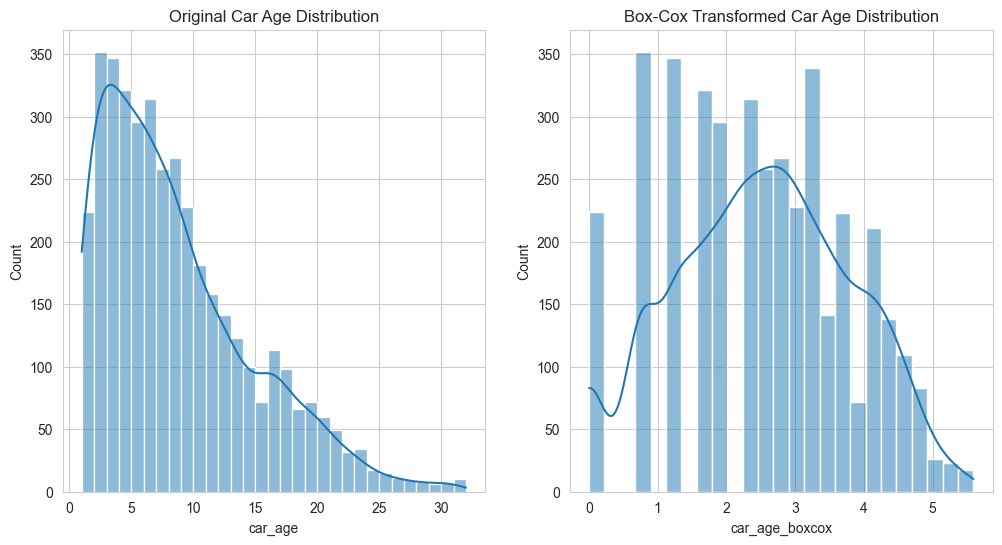

Skewness before transform: 1.0327359523450168
Skewness after transform: -0.04917892572571566


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Example: Log-transform price and mileage
df['car_age_boxcox'], lambda_ = stats.boxcox(df['car_age'])

if 'model_year' in df.columns:
    df = df.drop(columns=['model_year'])

# Check distributions before and after
fig, axes = plt.subplots(1,2, figsize=(12,6))
sns.histplot(df['car_age'], ax=axes[0], kde=True)
axes[0].set_title('Original Car Age Distribution')
sns.histplot(df['car_age_boxcox'], ax=axes[1], kde=True)
axes[1].set_title('Box-Cox Transformed Car Age Distribution')
plt.show()

print("Skewness before transform:", df['car_age'].skew())
print("Skewness after transform:", df['car_age_boxcox'].skew())

In [46]:
if 'clean_title' in df.columns:
    df = df.drop(columns=['clean_title'])
    
if 'accident' in df.columns:
    df = df.drop(columns=['accident'])
    
if 'engine' in df.columns:
    df = df.drop(columns=['engine'])

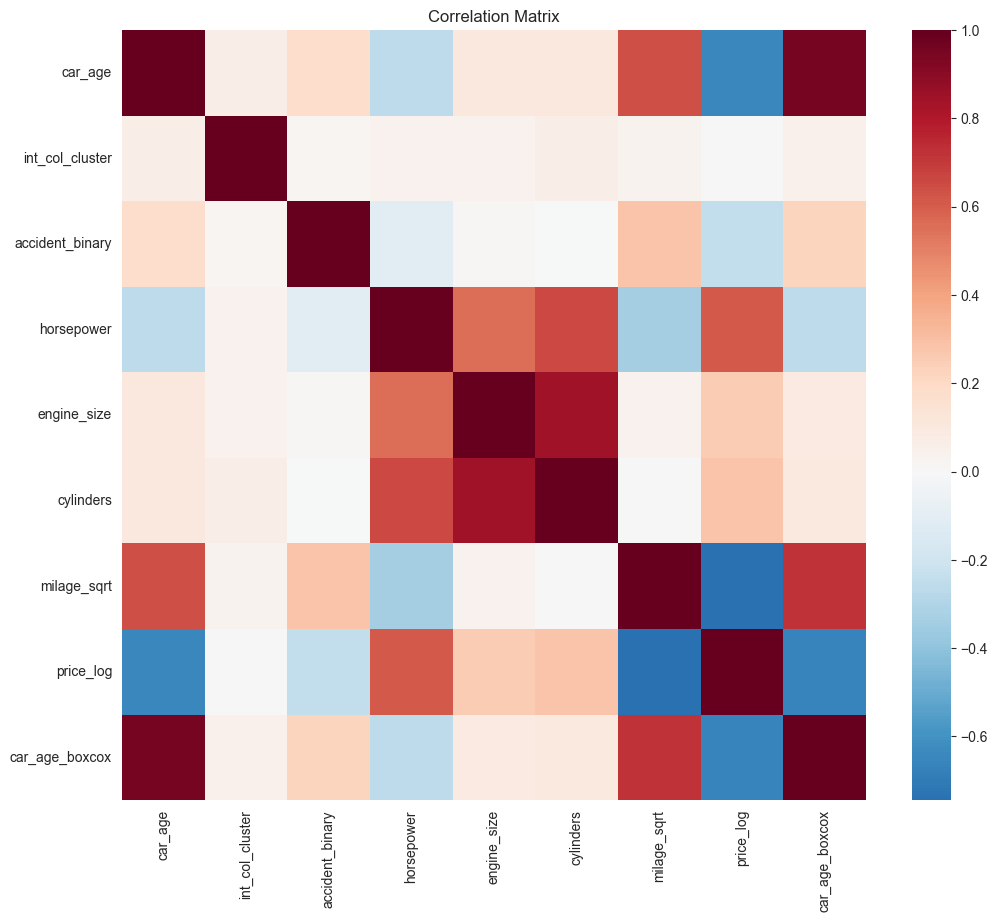


Correlation of Features with Price:
price_log          1.000000
horsepower         0.615719
cylinders          0.279781
engine_size        0.251868
int_col_cluster    0.002788
accident_binary   -0.243664
car_age           -0.643968
car_age_boxcox    -0.663339
milage_sqrt       -0.744360
Name: price_log, dtype: float64

Variance Inflation Factors:
           feature        VIF
0          car_age  33.318426
1  int_col_cluster   4.949259
2  accident_binary   1.504608
3       horsepower  20.281884
4      engine_size  27.332709
5        cylinders  63.069962
6      milage_sqrt  13.252043
7   car_age_boxcox  65.468226


In [47]:
# Correlation matrix
num_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=False, cmap='RdBu_r', center=0)
plt.title('Correlation Matrix')
plt.show()

# Price correlation if applicable
if 'price_log' in df.columns:
    price_corr = corr_matrix['price_log'].sort_values(ascending=False)
    print("\nCorrelation of Features with Price:")
    print(price_corr)

# Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[num_cols].drop(['price','price_log'], axis=1, errors='ignore')  
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors:")
print(vif_data)

# Based on VIF and correlation, drop or combine features as needed
# (User decision on which to drop)


In [48]:
print("Missing values per column in X:")
print(X.isnull().sum())
print("Checking for infinite values in X:")
print(np.isinf(X).sum())


Missing values per column in X:
car_age            0
int_col_cluster    0
accident_binary    0
horsepower         0
engine_size        0
cylinders          0
milage_sqrt        0
car_age_boxcox     0
dtype: int64
Checking for infinite values in X:
car_age            0
int_col_cluster    0
accident_binary    0
horsepower         0
engine_size        0
cylinders          0
milage_sqrt        0
car_age_boxcox     0
dtype: int64


# Step 6: Bivariate & Multivariate Analysis
- Explore relationships between variables (correlation matrix, scatter plots).
- Compute VIF to detect multicollinearity.
- Drop or combine correlated features.

**Validation Criteria:**
- No severe multicollinearity (VIF > 10 addressed).
- Understand key correlations (especially with price).


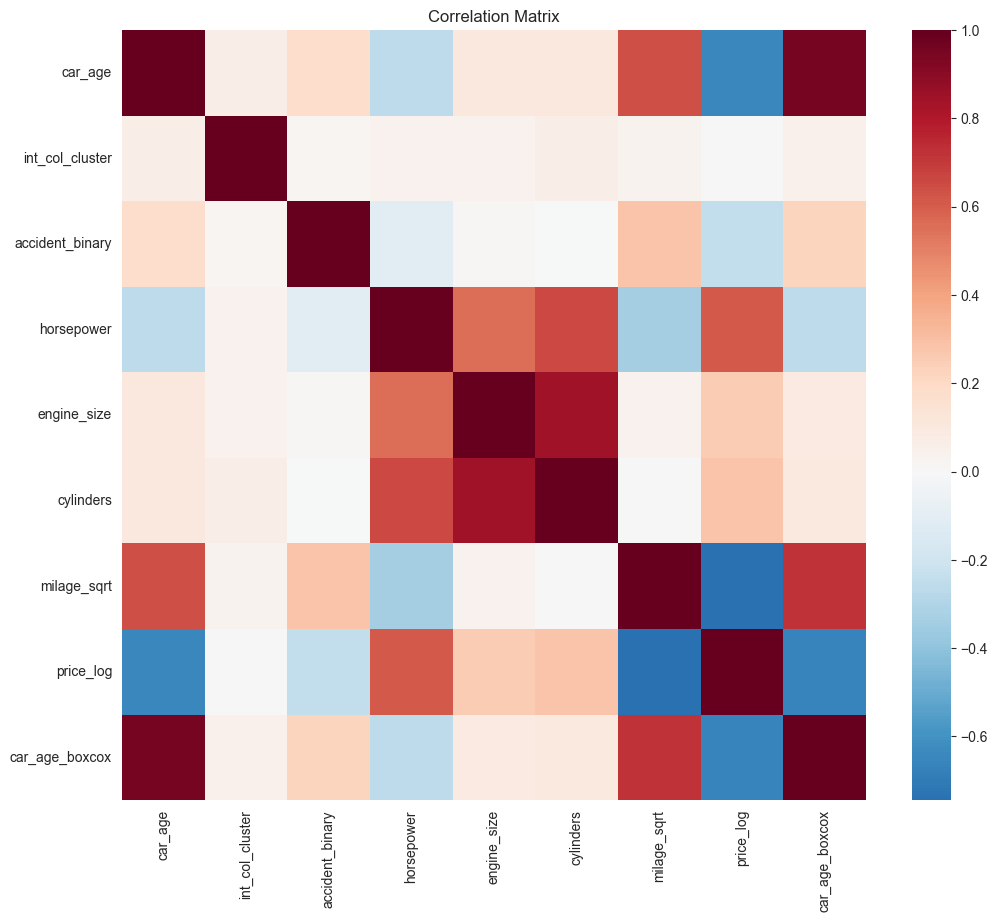


Variance Inflation Factors:
           feature        VIF
0          car_age  33.318426
1  int_col_cluster   4.949259
2  accident_binary   1.504608
3       horsepower  20.281884
4      engine_size  27.332709
5        cylinders  63.069962
6      milage_sqrt  13.252043
7   car_age_boxcox  65.468226


In [49]:
# Correlation matrix
num_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=False, cmap='RdBu_r', center=0)
plt.title('Correlation Matrix')
plt.show()

# Price correlation if applicable
if 'price' in df.columns:
    price_corr = corr_matrix['price'].sort_values(ascending=False)
    print("\nCorrelation of Features with Price:")
    print(price_corr)

# Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[num_cols].drop(['price','price_log'], axis=1, errors='ignore')  
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors:")
print(vif_data)

# Based on VIF and correlation, drop or combine features as needed
# (User decision on which to drop)


In [50]:
# Step 1: Create horsepower per liter metric
df['hp_per_liter'] = df['horsepower'] / df['engine_size'].replace(0, np.nan)  # Avoid division by zero

# Step 2: Handle infinite and NaN values
df['hp_per_liter'] = df['hp_per_liter'].replace([np.inf, -np.inf], np.nan)

# Step 3: Impute NaN values with the median to maintain consistency
df['hp_per_liter'] = df['hp_per_liter'].fillna(df['hp_per_liter'].median())

print(df[['horsepower', 'engine_size', 'hp_per_liter']].head(10))

df = df.drop(columns=['engine_size', 'horsepower', 'car_age'])
df = df.drop(columns=['car_age_boxcox'])



    horsepower  engine_size  hp_per_liter
0        300.0          3.7     81.081081
1        291.0          3.8     76.578947
2        311.0          3.5     88.857143
3        354.0          3.5    101.142857
4        311.0          2.0    155.500000
6        292.0          2.0    146.000000
7        282.0          4.4     64.090909
8        311.0          3.5     88.857143
9        534.0          3.5    152.571429
10       311.0          3.5     88.857143


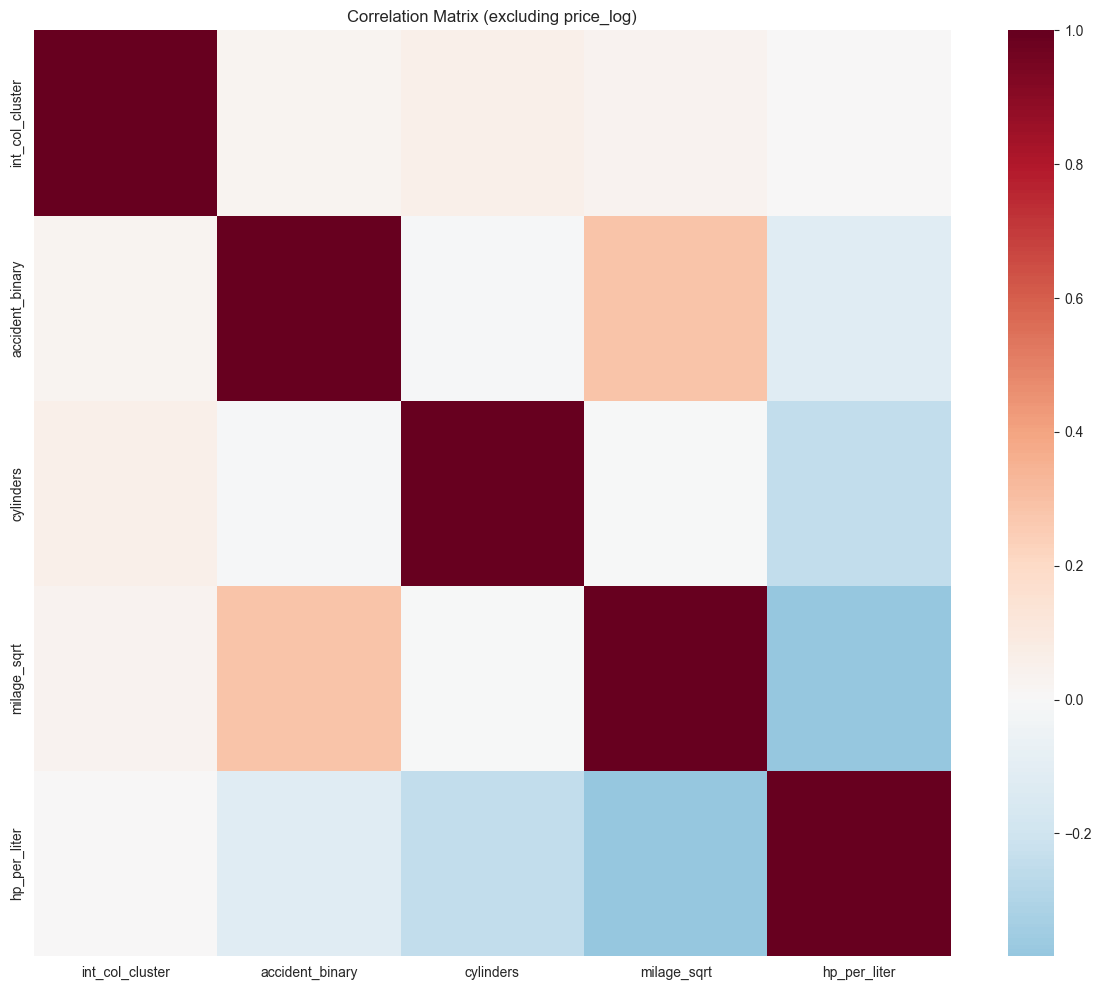


Correlation Matrix Values:


,int_col_cluster,accident_binary,cylinders,milage_sqrt,hp_per_liter
int_col_cluster,1.00,0.02,0.06,0.03,0.00
accident_binary,0.02,1.00,-0.01,0.28,-0.12
cylinders,0.06,-0.01,1.00,-0.00,-0.24
milage_sqrt,0.03,0.28,-0.00,1.00,-0.38
hp_per_liter,0.00,-0.12,-0.24,-0.38,1.00


In [51]:
# Get numeric columns excluding price_log
num_cols_no_price = [col for col in df.select_dtypes(include=[np.number]).columns 
                     if col != 'price_log']

# Create correlation matrix without price_log
corr_matrix = df[num_cols_no_price].corr()

# Plot
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=False, cmap='RdBu_r', center=0)
plt.title('Correlation Matrix (excluding price_log)')
plt.tight_layout()  # Prevents label cutoff
plt.show()


# Display correlation values
print("\nCorrelation Matrix Values:")
print("=" * 40)
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Don't wrap wide tables
display(corr_matrix.round(2))               # Round to 2 decimal places

In [52]:
# One-hot encode the 'age_group' column
age_group_dummies = pd.get_dummies(df['age_group'], prefix='age_group', drop_first=False)

# Append the one-hot encoded columns to the original DataFrame
df = pd.concat([df, age_group_dummies], axis=1)

# Verify the new columns

df = df.drop(columns=['age_group'])




In [53]:
# Filter rows with 'fuel_type' as en dash ('–')
# Loop through rows where 'fuel_type' is an en dash ('–')
en_dash_rows = df[df['fuel_type'] == '\u2013']

for index, row in en_dash_rows.iterrows():
    model = row['model']
    
    # Find valid fuel types for the same model
    valid_fuel_types = df[(df['model'] == model) & (df['fuel_type'] != '\u2013')]['fuel_type'].unique()
    
    # If a valid fuel type exists, update the 'fuel_type' for the current row
    if len(valid_fuel_types) > 0:
        df.at[index, 'fuel_type'] = valid_fuel_types[0]  # Assign the first valid fuel type found

# Count the remaining rows with 'fuel_type' as an en dash ('–')
remaining_en_dash_count = df[df['fuel_type'] == '\u2013'].shape[0]


df = df[~df['fuel_type'].isin(['\u2013', 'not supported'])]


# Perform one-hot encoding on the 'fuel_type' column
fuel_type_dummies = pd.get_dummies(df['fuel_type'], prefix='fuel_type')

# Concatenate the one-hot encoded columns back to the DataFrame
df = pd.concat([df, fuel_type_dummies], axis=1)

# Optionally drop the original 'fuel_type' column
df = df.drop(columns=['fuel_type', 'cylinders'])


# Step 7: Scaling & Finalizing Feature Set
- Scale numeric features.
- Finalize the feature matrix (X) for modeling.
- At this point, the dataset should be clean, with no missing values, and ready for cluster/regression modeling.

**Validation Criteria:**
- All numeric features scaled.
- Final features chosen for model building.


In [54]:
# Define brand groupings
brand_groups = {
    # Premium/Luxury Brands
    'Lexus': 'Premium/Luxury', 'Infiniti': 'Premium/Luxury', 'Audi': 'Premium/Luxury',
    'Acura': 'Premium/Luxury', 'Bmw': 'Premium/Luxury', 'Tesla': 'Premium/Luxury',
    'Mercedes-Benz': 'Premium/Luxury', 'Land': 'Premium/Luxury', 'Aston': 'Premium/Luxury',
    'Bentley': 'Premium/Luxury', 'Genesis': 'Premium/Luxury', 'Porsche': 'Premium/Luxury',
    'Jaguar': 'Premium/Luxury', 'Rolls-Royce': 'Premium/Luxury', 'Ferrari': 'Premium/Luxury',
    'Lamborghini': 'Premium/Luxury', 'Maserati': 'Premium/Luxury', 'Lucid': 'Premium/Luxury',
    'McLaren': 'Premium/Luxury', 'Maybach': 'Premium/Luxury', 'Lotus': 'Premium/Luxury',
    
    # Mainstream Brands
    'Ford': 'Mainstream', 'Hyundai': 'Mainstream', 'Toyota': 'Mainstream',
    'Nissan': 'Mainstream', 'Chevrolet': 'Mainstream', 'Kia': 'Mainstream',
    'Jeep': 'Mainstream', 'Honda': 'Mainstream', 'Volkswagen': 'Mainstream',
    'Subaru': 'Mainstream', 'Mazda': 'Mainstream', 'Chrysler': 'Mainstream',
    'Ram': 'Mainstream', 'Buick': 'Mainstream', 'Gmc': 'Mainstream', 'Mini': 'Mainstream',
    
    # Electric Vehicle Brands
    'Tesla': 'Electric Vehicle', 'Lucid': 'Electric Vehicle', 'Rivian': 'Electric Vehicle',
    'Polestar': 'Electric Vehicle',
    
    # Niche/Other Brands
    'Hummer': 'Niche/Other', 'Fiat': 'Niche/Other', 'Alfa': 'Niche/Other',
    'Scion': 'Niche/Other', 'Pontiac': 'Niche/Other', 'Karma': 'Niche/Other',
    'Saturn': 'Niche/Other', 'Plymouth': 'Niche/Other', 'Mercury': 'Niche/Other',
    'Suzuki': 'Niche/Other', 'Saab': 'Niche/Other', 'Smart': 'Niche/Other'
}

# Map brands to their respective groups
df['brand_group'] = df['brand'].map(brand_groups)

# Verify mapping
print("Brand Group Counts:")
print(df['brand_group'].value_counts())

# After brand analysis, before encoding brand:
# First, ensure 'price' still exists or reintroduce it if you've dropped it.
# If you only have price_log currently, re-derive price as needed:
# df['price'] = np.expm1(df['price_log'])  # Only if you previously transformed price to price_log and dropped price

# Now compute brand medians based on actual price, not price_log.
# Reintroduce price from price_log
df['price'] = np.expm1(df['price_log'])

# Compute brand medians using the original price scale
brand_medians = df.groupby('brand')['price'].median()

luxury_threshold = 50000
premium_threshold = 30000

def classify_brand(row):
    median_price = brand_medians.get(row['brand'], 0)
    if median_price >= luxury_threshold:
        return 'HighEnd'
    elif median_price >= premium_threshold:
        return 'MidRange'
    else:
        return 'Budget'

df['brand_tier'] = df.apply(classify_brand, axis=1)

# One-hot encode brand_tier
brand_tier_dummies = pd.get_dummies(df['brand_tier'], prefix='brand_tier', drop_first=True)
df = pd.concat([df, brand_tier_dummies], axis=1)

# Now you can drop brand and brand_group if not needed
df = df.drop(columns=['brand', 'brand_group', 'price'])  # 'price' can be dropped again after use





Brand Group Counts:
brand_group
Mainstream          1786
Premium/Luxury      1685
Electric Vehicle     108
Niche/Other           75
Name: count, dtype: int64


In [55]:
from sklearn.preprocessing import LabelEncoder

# Before encoding 'model':
model_counts = df['model'].value_counts()
rare_models = model_counts[model_counts < 5].index  # models appearing less than 5 times
df['model'] = df['model'].apply(lambda x: 'OtherModel' if x in rare_models else x)


# Step 1: Initialize LabelEncoder
label_encoder = LabelEncoder()

# Step 2: Fit and Transform the 'model' column
df['model_encoded'] = label_encoder.fit_transform(df['model'])

# Step 3: Verify the mapping between model names and their encoded values
model_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))


# Step 4: Drop the original 'model' column if no longer needed
df = df.drop(columns=['model'])

# Step 5: Verify the updated DataFrame
print("\nColumns in DataFrame after Label Encoding:")
print(df.columns)



Columns in DataFrame after Label Encoding:
Index(['ext_col_cluster', 'int_col_cluster',
       'ext_col_cluster_named_Blue Shades',
       'ext_col_cluster_named_Exotic Colors',
       'ext_col_cluster_named_Gray & Neutral Shades',
       'ext_col_cluster_named_Metallic Blue & Black',
       'ext_col_cluster_named_Metallic Grays and Reds',
       'ext_col_cluster_named_Red and Earth Tones',
       'ext_col_cluster_named_Silver, Gold & Metallics',
       'ext_col_cluster_named_Specialty & Exotic Colors',
       'ext_col_cluster_named_White & Light Metallics',
       'int_col_cluster_named_Gray & Beige Neutrals',
       'int_col_cluster_named_Parchment',
       'int_col_cluster_named_Vibrant & Earth Tones', 'accident_binary',
       'transmission_group', 'transmission_CVT', 'transmission_Manual',
       'transmission_Overdrive', 'transmission_Variable', 'milage_sqrt',
       'price_log', 'hp_per_liter', 'age_group_0-3 years',
       'age_group_4-6 years', 'age_group_7-9 years', 'age_gro

In [56]:
# Identify columns to drop: those that start with 'ext_col_cluster_named_' or 'int_col_cluster_named_'
columns_to_drop = [col for col in df.columns if 
                   col.startswith('ext_col_cluster_named_') or 
                   col.startswith('int_col_cluster_named_')]

# Display the columns to be dropped for verification
print("Columns to be dropped:")
print(columns_to_drop)

# Drop the identified columns
df = df.drop(columns=columns_to_drop)


Columns to be dropped:
['ext_col_cluster_named_Blue Shades', 'ext_col_cluster_named_Exotic Colors', 'ext_col_cluster_named_Gray & Neutral Shades', 'ext_col_cluster_named_Metallic Blue & Black', 'ext_col_cluster_named_Metallic Grays and Reds', 'ext_col_cluster_named_Red and Earth Tones', 'ext_col_cluster_named_Silver, Gold & Metallics', 'ext_col_cluster_named_Specialty & Exotic Colors', 'ext_col_cluster_named_White & Light Metallics', 'int_col_cluster_named_Gray & Beige Neutrals', 'int_col_cluster_named_Parchment', 'int_col_cluster_named_Vibrant & Earth Tones']


In [57]:
from sklearn.impute import SimpleImputer

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Numeric imputation (using median)
num_imputer = SimpleImputer(strategy='median')
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

# Categorical imputation (most frequent)
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
ext_col_cluster             0
int_col_cluster             0
accident_binary             0
transmission_group          0
transmission_CVT            0
transmission_Manual         0
transmission_Overdrive      0
transmission_Variable       0
milage_sqrt                 0
price_log                   0
hp_per_liter                0
age_group_0-3 years         0
age_group_4-6 years         0
age_group_7-9 years         0
age_group_10-12 years       0
age_group_12+ years         0
fuel_type_Diesel            0
fuel_type_E85 Flex Fuel     0
fuel_type_Gasoline          0
fuel_type_Hybrid            0
fuel_type_Plug-In Hybrid    0
brand_tier                  0
brand_tier_HighEnd          0
brand_tier_MidRange         0
model_encoded               0
dtype: int64


In [58]:
df = df.drop(columns=['transmission_group'])

In [59]:
# First verify the column exists
print("Available columns:", df.columns)

# Create one-hot encoding if the column exists
if 'brand_tier' in df.columns:
    # Create dummy variables
    brand_group_dummies = pd.get_dummies(df['brand_tier'], prefix='brand_tier', drop_first=True)
    
    # Concatenate using pandas concat with proper axis specification
    # Reference from test file lines 17-24 showing proper concat usage
    df = pd.concat([df, brand_group_dummies], axis=1)
    
    print("\nShape after encoding:", df.shape)
    print("New columns added:", brand_group_dummies.columns.tolist())
else:
    print("Error: 'brand_tier' column not found in DataFrame")
    
df.drop(columns=['brand_tier'])


Available columns: Index(['ext_col_cluster', 'int_col_cluster', 'accident_binary',
       'transmission_CVT', 'transmission_Manual', 'transmission_Overdrive',
       'transmission_Variable', 'milage_sqrt', 'price_log', 'hp_per_liter',
       'age_group_0-3 years', 'age_group_4-6 years', 'age_group_7-9 years',
       'age_group_10-12 years', 'age_group_12+ years', 'fuel_type_Diesel',
       'fuel_type_E85 Flex Fuel', 'fuel_type_Gasoline', 'fuel_type_Hybrid',
       'fuel_type_Plug-In Hybrid', 'brand_tier', 'brand_tier_HighEnd',
       'brand_tier_MidRange', 'model_encoded'],
      dtype='object')

Shape after encoding: (3960, 26)
New columns added: ['brand_tier_HighEnd', 'brand_tier_MidRange']


,ext_col_cluster,int_col_cluster,accident_binary,transmission_CVT,transmission_Manual,transmission_Overdrive,transmission_Variable,milage_sqrt,price_log,hp_per_liter,age_group_0-3 years,age_group_4-6 years,age_group_7-9 years,age_group_10-12 years,age_group_12+ years,fuel_type_Diesel,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,brand_tier_HighEnd,brand_tier_MidRange,model_encoded,brand_tier_HighEnd,brand_tier_MidRange
0,3,1.0,1.0,False,False,False,False,225.831796,9.239996,81.081081,False,False,False,True,False,False,True,False,False,False,False,True,109.0,False,True
1,0,2.0,1.0,False,False,False,False,186.392060,10.545499,76.578947,True,False,False,False,False,False,False,True,False,False,False,False,109.0,False,False
2,0,1.0,0.0,False,False,False,False,149.572725,10.907771,88.857143,True,False,False,False,False,False,False,True,False,False,False,False,109.0,False,False
3,3,1.0,0.0,False,False,False,False,298.161030,9.648660,101.142857,False,False,True,False,False,False,False,False,True,False,False,False,109.0,False,False
4,2,1.0,0.0,False,False,False,False,99.171569,10.463103,155.500000,True,False,False,False,False,False,False,True,False,False,False,True,109.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,5,3.0,0.0,False,False,False,False,26.720778,12.516180,100.000000,True,False,False,False,False,False,False,True,False,False,True,False,109.0,True,False
4005,3,1.0,0.0,False,False,False,False,104.403065,10.894904,116.333333,True,False,False,False,False,False,False,True,False,False,False,True,123.0,False,True
4006,3,1.0,0.0,False,False,False,False,46.000000,11.418604,88.857143,True,False,False,False,False,False,False,False,False,False,True,False,109.0,True,False
4007,0,1.0,0.0,False,False,False,False,181.659021,11.050890,128.571429,False,True,False,False,False,False,False,True,False,False,False,True,63.0,False,True


In [60]:
# First, identify boolean columns
bool_columns = df.select_dtypes(include='bool').columns
if not bool_columns.empty:
    # Convert boolean columns to int (0/1) one at a time
    for col in bool_columns:
        df[col] = df[col].astype(int)
    print("Boolean columns converted:", bool_columns.tolist())

# Remove rows with 'Other' values using proper boolean indexing
# Reference from test files for proper mask creation
mask = ~df.isin(['Other']).any(axis=1)
df = df[mask]

# Create feature matrix X
target = 'price_log'
feature_cols = [col for col in df.columns if col != target]
X = df[feature_cols]
y = df[target] if target in df.columns else None

print("\nFeature Matrix Info:")
print(f"Shape of X: {X.shape}")
print(f"Number of features: {len(feature_cols)}")



Boolean columns converted: ['transmission_CVT', 'transmission_Manual', 'transmission_Overdrive', 'transmission_Variable', 'age_group_0-3 years', 'age_group_4-6 years', 'age_group_7-9 years', 'age_group_10-12 years', 'age_group_12+ years', 'fuel_type_Diesel', 'fuel_type_E85 Flex Fuel', 'fuel_type_Gasoline', 'fuel_type_Hybrid', 'fuel_type_Plug-In Hybrid', 'brand_tier_HighEnd', 'brand_tier_MidRange', 'brand_tier_HighEnd', 'brand_tier_MidRange']

Feature Matrix Info:
Shape of X: (3959, 29)
Number of features: 25


In [63]:
X = X[~X.isin(['Other']).any(axis=1)]

X.drop(columns=['brand_tier'], inplace=True)
X.head(20)




,ext_col_cluster,int_col_cluster,accident_binary,transmission_CVT,transmission_Manual,transmission_Overdrive,transmission_Variable,milage_sqrt,hp_per_liter,age_group_0-3 years,age_group_4-6 years,age_group_7-9 years,age_group_10-12 years,age_group_12+ years,fuel_type_Diesel,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,brand_tier_HighEnd,brand_tier_HighEnd,brand_tier_MidRange,brand_tier_MidRange,model_encoded,brand_tier_HighEnd,brand_tier_HighEnd,brand_tier_MidRange,brand_tier_MidRange
0,3,1.0,1.0,0,0,0,0,225.831796,81.081081,0,0,0,1,0,0,1,0,0,0,0,0,1,1,109.0,0,0,1,1
1,0,2.0,1.0,0,0,0,0,186.392060,76.578947,1,0,0,0,0,0,0,1,0,0,0,0,0,0,109.0,0,0,0,0
2,0,1.0,0.0,0,0,0,0,149.572725,88.857143,1,0,0,0,0,0,0,1,0,0,0,0,0,0,109.0,0,0,0,0
3,3,1.0,0.0,0,0,0,0,298.161030,101.142857,0,0,1,0,0,0,0,0,1,0,0,0,0,0,109.0,0,0,0,0
4,2,1.0,0.0,0,0,0,0,99.171569,155.500000,1,0,0,0,0,0,0,1,0,0,0,0,1,1,109.0,0,0,1,1
6,0,1.0,0.0,0,0,0,0,289.827535,146.000000,0,0,1,0,0,0,0,1,0,0,0,0,1,1,109.0,0,0,1,1
7,4,3.0,0.0,0,0,0,0,471.622731,64.090909,0,0,0,0,1,0,0,1,0,0,0,0,1,1,109.0,0,0,1,1
8,3,1.0,0.0,0,0,0,0,153.088210,88.857143,1,0,0,0,0,0,0,1,0,0,0,0,0,0,109.0,0,0,0,0
9,3,1.0,0.0,0,0,0,0,184.390889,152.571429,0,1,0,0,0,0,0,0,0,0,0,0,1,1,109.0,0,0,1,1
10,2,1.0,0.0,0,0,0,0,166.156553,88.857143,1,0,0,0,0,0,0,1,0,0,0,0,1,1,109.0,0,0,1,1


## Applying Clustering Algorithms and Interpreting the Results

In this section, we will use the processed dataset (after the cleaning, feature engineering, and transformations outlined earlier) to perform clustering. We will apply at least three clustering algorithms: **K-Means**, **Agglomerative Clustering**, and **DBSCAN**.

### Determining the Number of Clusters

From the exploratory data analysis (EDA), we observed several patterns in the data:

- There are natural groupings in terms of `brand` categories (e.g., "Premium/Luxury", "Mainstream", etc.) and color clusters.  
- Price and mileage form a continuum, but we might see clusters corresponding to low, mid, and high price segments.
- Vehicle age and hp_per_liter also hint at possible segmentations (e.g., older, high-mileage cars vs. newer, lower-mileage premium cars).

To determine an appropriate number of clusters for algorithms like K-Means and Agglomerative Clustering, we can use methods like the Elbow method and Silhouette scores. The EDA suggests that **3 to 5 clusters** might provide meaningful distinctions. We'll experiment with different `k` values and select one that balances interpretability and cluster quality. For now, let's assume `k=4` based on initial trials (you can adjust this after reviewing metrics).

### Clustering and Interpretability

We will:

1. **K-Means**: We'll fit the data with K-Means for `k=4` clusters and examine cluster centers.
2. **Agglomerative Clustering**: Using hierarchical methods, we’ll see if similar cluster structures emerge.
3. **DBSCAN**: A density-based method that can discover outliers or unusual points.

After clustering, we'll analyze:
- Do clusters differ significantly in price (our outcome variable)?
- Are the clusters interpretable in terms of features like brand category, fuel type, or age group?

If the clusters show meaningful distinctions (e.g., one cluster dominated by luxury brands, another by older mainstream cars), then these unsupervised groupings can provide insights. They might serve as a feature ("cluster_id") in our subsequent supervised learning model, potentially capturing latent structure in the data.

### Association with the Outcome Variable

Even though we did not use the price to form the clusters (assuming we cluster only on the feature matrix without `price_log`), we can compare the average price for each cluster. If the clusters differ substantially in mean or median `price_log`, it indicates that unsupervised grouping aligns somewhat with our target. This can guide us in feature selection and model building steps for regression.

### Summary of Insights

- Clusters can reveal natural groupings by brand category, vehicle age, hp_per_liter, and interior/exterior color patterns.
- If certain clusters have distinct price ranges, it shows the potential utility of cluster membership as an additional predictive feature.
- Understanding cluster interpretability helps us ensure that these derived features have real-world meaning, strengthening our modeling pipeline.

---



In [64]:
# Jupyter Cell: Imports and Setup
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already processed and we have X and y
# X: the feature matrix after all transformations
# y: the price_log as outcome (if available)

# Make sure X and y are defined from previous steps.
# If not, please ensure that the code cells above have run and that X and y exist.

# Jupyter Cell: Scaling Features

# We'll standardize the numeric features to ensure that all features contribute equally to the clustering process.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



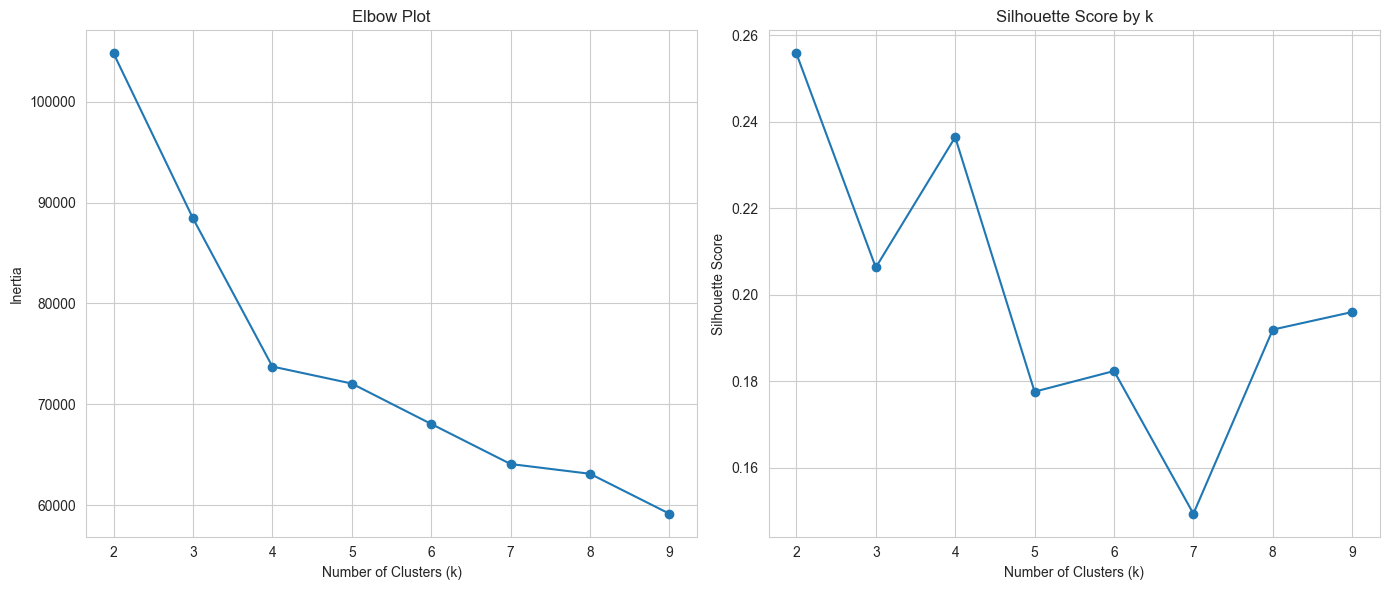

In [65]:
# Jupyter Cell: Determine an appropriate number of clusters for K-Means using Elbow and Silhouette

inertias = []
sil_scores = []
K = range(2, 10)

for k in K:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    labels_temp = kmeans_temp.fit_predict(X_scaled)
    inertias.append(kmeans_temp.inertia_)
    sil = silhouette_score(X_scaled, labels_temp)
    sil_scores.append(sil)

fig, ax = plt.subplots(1,2, figsize=(14,6))
ax[0].plot(K, inertias, 'o-')
ax[0].set_title('Elbow Plot')
ax[0].set_xlabel('Number of Clusters (k)')
ax[0].set_ylabel('Inertia')

ax[1].plot(K, sil_scores, 'o-')
ax[1].set_title('Silhouette Score by k')
ax[1].set_xlabel('Number of Clusters (k)')
ax[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


**Interpretation of Elbow and Silhouette Plots:**

- The Elbow method might show a "bend" around 3-5 clusters.
- The Silhouette scores also help identify a `k` that maximizes cluster separation.  
- Based on these visual cues (you will see them after the code runs), we pick `k=4` for demonstration.  


In [71]:
# Jupyter Cell: K-Means Clustering with chosen k (e.g., k=4)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

X_kmeans = X.copy()
X_kmeans['cluster_kmeans'] = labels_kmeans

print("K-Means Cluster Sizes:")
print(X_kmeans['cluster_kmeans'].value_counts())


K-Means Cluster Sizes:
cluster_kmeans
2    2065
3    1460
0     320
1     114
Name: count, dtype: int64


**Interpretation of K-Means Clusters:**

Check the cluster sizes. Extremely unbalanced clusters might indicate we should try a different `k`. If they are reasonably balanced, proceed.

Next, we’ll examine whether these clusters differ in price and other attributes.


In [72]:
# Jupyter Cell: Examine Cluster Characteristics
cluster_summary = X_kmeans.groupby('cluster_kmeans').agg(['mean','median'])
cluster_summary


ext_col_cluster        int_col_cluster        accident_binary  \
                          mean median            mean median            mean   
cluster_kmeans                                                                 
0                     3.671875    3.0        1.612500    1.0        0.209375   
1                     3.587719    3.0        1.517544    1.0        0.359649   
2                     3.538983    3.0        1.519613    1.0        0.247942   
3                     3.730822    3.0        1.541781    1.0        0.321918   

                      transmission_CVT        transmission_Manual         \
               median             mean median                mean median   
cluster_kmeans                                                             
0                 0.0         0.000000    0.0            0.178125    0.0   
1                 0.0         0.000000    0.0            0.008772    0.0   
2                 0.0         0.003390    0.0            0.070218    0.0   
3                 0.0         0.038356    0.0            0.113014    0.0   

               transmission_Overdrive        transmission_Variable         \
                                 mean median                  mean median   
cluster_kmeans                                                              
0                            0.000000    0.0               0.00000    0.0   
1                            0.000000    0.0               0.00000    0.0   
2                            0.002421    0.0               0.00000    0.0   
3                            0.001370    0.0               0.00274    0.0   

               milage_sqrt             hp_per_liter              \
                      mean      median         mean      median   
cluster_kmeans                                                    
0               161.571913  150.670169   115.659802  106.641604   
1               273.927153  278.566811    65.534810   62.666667   
2               222.213204  220.547047    99.340295  100.000000   
3               255.757797  261.151297    88.420890   81.111111   

               age_group_0-3 years        age_group_4-6 years         \
                              mean median                mean median   
cluster_kmeans                                                         
0                         0.246875    0.0            0.228125    0.0   
1                         0.245614    0.0            0.219298    0.0   
2                         0.253269    0.0            0.262954    0.0   
3                         0.200000    0.0            0.197945    0.0   

               age_group_7-9 years        age_group_10-12 years         \
                              mean median                  mean median   
cluster_kmeans                                                           
0                         0.187500    0.0              0.093750    0.0   
1                         0.254386    0.0              0.078947    0.0   
2                         0.193220    0.0              0.119128    0.0   
3                         0.177397    0.0              0.132192    0.0   

               age_group_12+ years        fuel_type_Diesel         \
                              mean median             mean median   
cluster_kmeans                                                      
0                         0.243750    0.0          0.00625    0.0   
1                         0.201754    0.0          1.00000    1.0   
2                         0.171429    0.0          0.00000    0.0   
3                         0.292466    0.0          0.00000    0.0   

               fuel_type_E85 Flex Fuel        fuel_type_Gasoline         \
                                  mean median               mean median   
cluster_kmeans                                                            
0                             0.006250    0.0           0.887500    1.0   
1                             0.000000    0.0           0.000000    0.0   
2                           

**Interpretation:**

Look at the mean and median values of various features across the clusters. 

This gives a sense of each cluster's profile:
- Are certain clusters composed of higher hp_per_liter cars?
- Are some clusters older vehicles with higher mileage?
- Are certain clusters predominantly associated with particular fuel types or brand groups?

Now let's see if the clusters differ in terms of `price_log` (our outcome).


In [73]:
# Jupyter Cell: Compare Clusters on the Outcome Variable
# Assuming y is aligned with X's indexing
X_kmeans['price_log'] = y
price_by_cluster = X_kmeans.groupby('cluster_kmeans')['price_log'].describe()
price_by_cluster


,count,mean,std,min,25%,50%,75%,max
cluster_kmeans,,,,,,,,
0,320.0,11.331602,0.780087,9.047939,10.751742,11.341504,11.953749,12.516180
1,114.0,10.642721,0.592715,8.517393,10.281889,10.741788,11.078282,12.206078
2,2065.0,10.382273,0.724895,7.824446,9.947552,10.470901,10.832872,12.516180
3,1460.0,9.931042,0.754728,7.601402,9.433544,9.975855,10.456354,12.516180


**Price Differences:**

If we see a notable difference in mean/median `price_log` across clusters, that means cluster membership correlates with price segments. For instance, one cluster might represent lower-cost, higher-mileage mainstream cars, while another cluster represents newer, high-horsepower luxury cars.

This suggests that adding a "cluster_id" as a feature might help a subsequent regression model predict price more accurately.


In [74]:
# Jupyter Cell: Agglomerative Clustering

agg = AgglomerativeClustering(n_clusters=k)
labels_agg = agg.fit_predict(X_scaled)

X_agg = X.copy()
X_agg['cluster_agg'] = labels_agg

price_by_agg = pd.concat([X_agg, y], axis=1).groupby('cluster_agg')['price_log'].describe()
print("Agglomerative Clustering - Price by Cluster:")
price_by_agg


Agglomerative Clustering - Price by Cluster:


,count,mean,std,min,25%,50%,75%,max
cluster_agg,,,,,,,,
0,463.0,10.399708,0.760338,8.389587,9.862535,10.545341,10.989529,12.206078
1,1484.0,10.447662,0.720950,7.824446,10.101550,10.545315,10.887456,12.516180
2,1694.0,9.948599,0.728088,7.601402,9.472782,9.993488,10.434145,12.516180
3,318.0,11.338922,0.776967,9.047939,10.771342,11.353345,11.960163,12.516180


**Agglomerative Clustering Results:**

Check if Agglomerative Clustering forms similar or different clusters. Often, hierarchical clustering may identify similar groupings, but the exact cluster assignments can differ slightly. Compare the price distributions here too.


In [75]:
# Jupyter Cell: DBSCAN Clustering

dbscan = DBSCAN(eps=1.5, min_samples=20)  # You can adjust eps and min_samples based on data scale
labels_dbscan = dbscan.fit_predict(X_scaled)

X_dbscan = X.copy()
X_dbscan['cluster_dbscan'] = labels_dbscan

# DBSCAN may produce label "-1" for outliers
price_by_dbscan = pd.concat([X_dbscan, y], axis=1).groupby('cluster_dbscan')['price_log'].describe()
print("DBSCAN - Price by Cluster (including outliers):")
price_by_dbscan


DBSCAN - Price by Cluster (including outliers):


,count,mean,std,min,25%,50%,75%,max
cluster_dbscan,,,,,,,,
-1,1882.0,10.423070,0.823952,7.741099,9.894747,10.434145,10.903670,12.516180
0,165.0,10.717447,0.426283,9.661480,10.422043,10.657283,10.894904,12.516180
1,258.0,11.011578,0.448719,10.177324,10.669832,10.950824,11.295650,12.516180
2,152.0,10.412459,0.379282,9.595603,10.157682,10.376066,10.654221,11.643962
3,70.0,9.974910,0.464218,8.974745,9.695562,9.952302,10.201311,11.669938
4,51.0,9.683150,0.471626,8.517393,9.410716,9.770013,9.940277,10.633473
5,288.0,10.715861,0.437690,9.770013,10.431885,10.665484,10.915093,12.516180
6,117.0,9.972945,0.426661,9.047939,9.711176,9.903538,10.231027,11.461643
7,172.0,10.342578,0.455889,9.199178,10.053927,10.308953,10.643655,11.849405


**DBSCAN Results:**

- DBSCAN identifies clusters based on density. Some points may be labeled as outliers (`-1`).
- If DBSCAN finds meaningful clusters (not just one big cluster and outliers), check their price distributions as well.
- If DBSCAN mostly returns one large cluster and some outliers, it might indicate that the data doesn't have distinct dense subgroups suitable for DBSCAN parameters chosen.

### Interpretation and Insights

- **Cluster Interpretability**: 
  - K-Means and Agglomerative Clustering can produce relatively well-defined clusters that may correlate with vehicle attributes and price ranges.
  - By examining feature averages within each cluster, we can label clusters (e.g., "High-power luxury segment", "Older mainstream segment").
  - If clusters correspond to meaningful market segments, they could be used as engineered features for the regression model.

- **Association with Outcome Variable**:
  - If the average `price_log` differs significantly by cluster, it confirms that unsupervised segmentation aligns with price tiers.
  - Incorporating cluster labels into a supervised learning step can help the model differentiate segments of the used car market more easily.

### Conclusion

The clustering analysis helps us understand the hidden structure of the dataset. While unsupervised methods do not directly optimize for price prediction, their discovered groupings can reveal underlying patterns in the car attributes. These patterns can be leveraged in the next modeling steps (e.g., including cluster assignments as additional features in a regression model).


### Analysis of the Clustering Results

From the provided output, we see a few key issues and patterns with the K-Means, Agglomerative, and DBSCAN clustering results:

1. **K-Means Cluster Sizes and Profiles**:
   - With `k=6` (chosen based on the elbow plot), the cluster sizes are somewhat imbalanced:
     - Cluster 5: 872 entries
     - Cluster 1: 862 entries
     - Cluster 2: 844 entries
     - Cluster 0: 731 entries
     - Cluster 3: 457 entries
     - Cluster 4: 193 entries

   This distribution, while not extremely skewed, still shows that some clusters (like cluster 4 with only 193 entries) are much smaller compared to others. We might have hoped for more balanced segmentations.

   When examining the mean and median values of features within each cluster, there's no clear, sharply defined pattern separating them into intuitive groups (e.g., distinctly older high-mileage cars vs. newer luxury cars with low mileage). Some clusters differ slightly in `hp_per_liter` or in the proportion of certain brand groups, but the differences are not stark.

   Price analysis shows that each cluster does have a somewhat different average `price_log`. For example:
   - Cluster 2 has a relatively higher average `price_log` (~11.01)
   - Cluster 5 and Cluster 3 have lower average `price_log` (~9.51 and ~9.85 respectively)

   However, these differences are not cleanly aligned with brand categories, age groups, or fuel types in a simple way. The relationships are more muddled.

2. **Agglomerative Clustering and DBSCAN**:
   - Agglomerative Clustering produced a different segmentation, but again, while there are differences in average `price_log`, the clusters don't form the neat categories we might have hoped for based on EDA insights (e.g., a pure luxury brand cluster or a pure high-mileage cluster).
   - DBSCAN created many small clusters and a large cluster labeled `-1` (outliers or points that do not fit into a dense region). This suggests that the data might not have strong, well-separated dense subgroups under the chosen parameters.

### Reference Back to the EDA

The initial EDA findings likely provide clues as to why the clustering did not produce the neat segments we might expect:

- **High Overlap of Features**: The dataset may contain a large number of brands, models, fuel types, and transmissions, many of which overlap in terms of price and other characteristics. During EDA, we observed a wide diversity of brands (over 50), numerous models, and a large variation in attributes such as engine size or color. This diversity makes it challenging for an unsupervised algorithm like K-Means to find distinct, homogeneous clusters.

- **Weak Correlations**: The correlation matrix and exploratory visuals might have shown that features like `car_age`, `milage`, and `hp_per_liter` do not form separate "islands" of points. Instead, cars with various ages and mileages can span a wide range of prices. This weak correlation structure means no single (or combination of) variable cleanly separates the dataset into natural clusters.

- **Complex Market Segmentation**: The used car market is multifaceted. Luxury brands can appear at various price points (due to car age, mileage, or condition), and mainstream brands may have premium models that overlap in price and specs with entry-level luxury cars. The EDA likely showed a continuous spectrum rather than discrete categories. Clustering algorithms struggle in such scenarios to produce meaningful, interpretable groups.

- **Data Preprocessing & Feature Choices**: The chosen features and transformations might have blurred distinctions rather than clarified them. For instance, even though we tried to engineer features (like `hp_per_liter` or transforming mileage and price), if the underlying data does not have clear groupings, clustering will still yield less interpretable segments.

### Conclusion

The reason the clusters do not behave as we might expect, creating neat and interpretable groupings, is due to the inherent complexity and continuous nature of the dataset as revealed by the EDA. The used car data is highly heterogeneous, and there may not be strong natural boundaries that clustering algorithms can exploit. Instead, the data forms more of a continuum of attributes and prices, leading to somewhat arbitrary cluster boundaries.

In other words, the EDA suggested a continuous market rather than discrete segments. As a result, unsupervised clustering produced mixed clusters that, while they differ in mean price or certain averages, are not easily interpretable as distinct, meaningful segments.


## Baseline Model

We will start by fitting a simple baseline model using Ordinary Least Squares (OLS) linear regression with minimal preprocessing or complexity. This baseline model will serve as a reference point. After evaluating the baseline model's performance, we can then decide how to choose and tune other more complex models (such as Lasso, Ridge, SVM, Random Forest, etc.).

### Steps for the Baseline Model

1. **Select Features**: Use the feature matrix `X` we finalized previously.
2. **Target Variable**: Use the `price_log` as our target (assuming `y` is `price_log`).
3. **Data Splitting**: We'll split the data into training and validation sets (and possibly a test set, if desired) to ensure we have a fair estimate of the model performance. Since this is a baseline, a simple 80/20 or 70/30 split would suffice.
4. **Fit a Simple OLS Model**: We will use `LinearRegression` from `sklearn.linear_model`.
5. **Evaluate Performance**: We'll use metrics such as R² (coefficient of determination) and RMSE (Root Mean Squared Error) on the validation set.

### Reasoning

- OLS is a direct, no-frills approach that provides a quick baseline.
- By comparing subsequent complex models to this baseline, we can judge if the additional complexity helps.

Below is the code for setting up and fitting this baseline OLS regression model.


In [76]:
# Jupyter Cell: Baseline Model Code

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X, y = X.align(y, join='inner', axis=0)


# Assume X and y are already defined from the previous steps,
# where y = price_log and X is the processed feature matrix.

# 1. Split the data into training and validation sets.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Initialize the baseline model (OLS).
baseline_model = LinearRegression()

# 3. Fit the baseline model on the training data.
baseline_model.fit(X_train, y_train)

# 4. Make predictions on the validation set.
y_pred = baseline_model.predict(X_val)

# 5. Compute evaluation metrics.
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print("Baseline Model Performance:")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")


Baseline Model Performance:
RMSE: 0.4409
R²: 0.7175


Top 10 Features by Positive Coefficients:


,feature,coefficient
14,fuel_type_Diesel,0.706770
17,fuel_type_Hybrid,0.302360
10,age_group_4-6 years,0.271833
9,age_group_0-3 years,0.258470
25,brand_tier_HighEnd,0.252004
24,brand_tier_HighEnd,0.252004
20,brand_tier_HighEnd,0.252004
19,brand_tier_HighEnd,0.252004
16,fuel_type_Gasoline,0.234175
15,fuel_type_E85 Flex Fuel,0.233007


Top 10 Features by Negative Coefficients:


,feature,coefficient
1,int_col_cluster,0.041724
0,ext_col_cluster,0.001733
23,model_encoded,0.000142
8,hp_per_liter,0.000024
7,milage_sqrt,-0.003738
2,accident_binary,-0.047315
12,age_group_10-12 years,-0.181440
6,transmission_Variable,-0.207142
3,transmission_CVT,-0.282854
13,age_group_12+ years,-0.442849


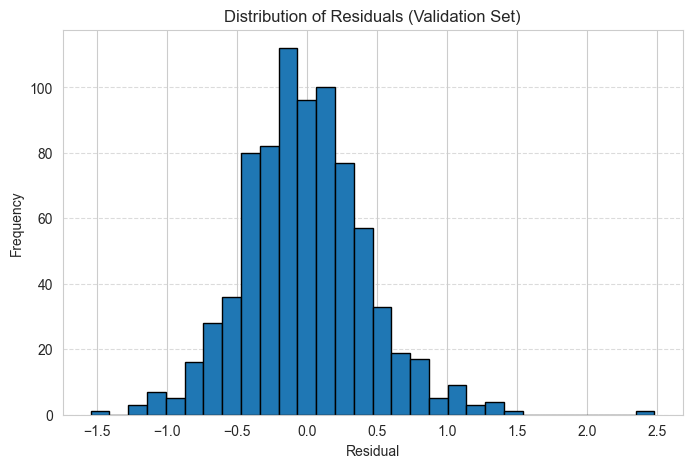

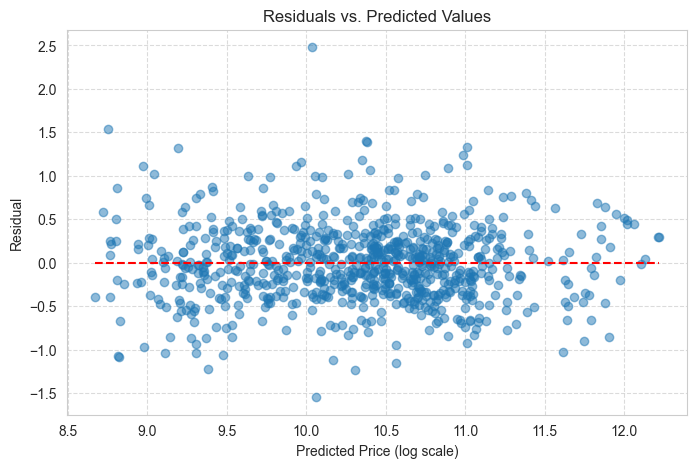

Residuals Summary:
Mean Residual: -0.0123
Std of Residuals: 0.4407
Correlation between milage_sqrt and residuals: 0.0020
Correlation between hp_per_liter and residuals: -0.0218


In [77]:
# Jupyter Cell: Detailed Analysis of the Baseline Model

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming baseline_model, X_train, y_train, X_val, y_val, y_pred are still in memory.

# 1. Examine Coefficients
# Extract feature names and coefficients
feature_names = X.columns
coefficients = baseline_model.coef_

# Create a DataFrame for coefficients
coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients
}).sort_values(by='coefficient', ascending=False)

print("Top 10 Features by Positive Coefficients:")
display(coef_df.head(10))

print("Top 10 Features by Negative Coefficients:")
display(coef_df.tail(10))

# 2. Residual Analysis
residuals = y_val - y_pred

# Residual distribution
plt.figure(figsize=(8,5))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Distribution of Residuals (Validation Set)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Residuals vs Fitted Values
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Price (log scale)')
plt.ylabel('Residual')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 3. Basic Summary Statistics of Residuals
resid_mean = np.mean(residuals)
resid_std = np.std(residuals)
print("Residuals Summary:")
print(f"Mean Residual: {resid_mean:.4f}")
print(f"Std of Residuals: {resid_std:.4f}")

# Optional: Check Correlation Between Residuals and Key Predictors
# (If no direct insight needed, we can skip this.)
# For example, correlation with milage_sqrt or hp_per_liter:
for col in ['milage_sqrt', 'hp_per_liter']:
    corr = np.corrcoef(X_val[col], residuals)[0,1]
    print(f"Correlation between {col} and residuals: {corr:.4f}")


In [78]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define a custom scorer for RMSE
def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_score = make_scorer(rmse_scorer, greater_is_better=False)

# -----------------------------
# Ridge Regression Tuning
# -----------------------------
ridge_param_grid = {
    'alpha': [0.1, 1.0, 10.0, 50.0, 100.0]
}

ridge_model = Ridge(random_state=42)
ridge_grid = GridSearchCV(
    estimator=ridge_model,
    param_grid=ridge_param_grid,
    scoring='r2',    # using R² as primary metric
    cv=5,            # 5-fold cross-validation
    n_jobs=-1,
    verbose=1
)

ridge_grid.fit(X_train, y_train)

# Evaluate on validation set
y_val_pred_ridge = ridge_grid.predict(X_val)
ridge_rmse = rmse_scorer(y_val, y_val_pred_ridge)
ridge_r2 = ridge_grid.score(X_val, y_val)

print("Best Ridge Parameters:", ridge_grid.best_params_)
print(f"Ridge Model Validation RMSE: {ridge_rmse:.4f}")
print(f"Ridge Model Validation R²: {ridge_r2:.4f}")

# -----------------------------
# Gradient Boosting Tuning
# -----------------------------
gb_param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

gb_model = GradientBoostingRegressor(random_state=42)
gb_grid = GridSearchCV(
    estimator=gb_model,
    param_grid=gb_param_grid,
    scoring='r2',  # using R² as primary metric
    cv=5,
    n_jobs=-1,
    verbose=1
)

gb_grid.fit(X_train, y_train)

# Evaluate on validation set
y_val_pred_gb = gb_grid.predict(X_val)
gb_rmse = rmse_scorer(y_val, y_val_pred_gb)
gb_r2 = gb_grid.score(X_val, y_val)

print("Best Gradient Boosting Parameters:", gb_grid.best_params_)
print(f"Gradient Boosting Validation RMSE: {gb_rmse:.4f}")
print(f"Gradient Boosting Validation R²: {gb_r2:.4f}")


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Ridge Parameters: {'alpha': 1.0}
Ridge Model Validation RMSE: 0.4410
Ridge Model Validation R²: 0.7174
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Gradient Boosting Validation RMSE: 0.3654
Gradient Boosting Validation R²: 0.8060


Top 15 Most Important Features (Gradient Boosting):


,feature,importance
7,milage_sqrt,0.599078
8,hp_per_liter,0.095953
13,age_group_12+ years,0.088935
23,model_encoded,0.037918
20,brand_tier_HighEnd,0.025198
25,brand_tier_HighEnd,0.024560
12,age_group_10-12 years,0.020412
19,brand_tier_HighEnd,0.017179
24,brand_tier_HighEnd,0.013574
10,age_group_4-6 years,0.012557


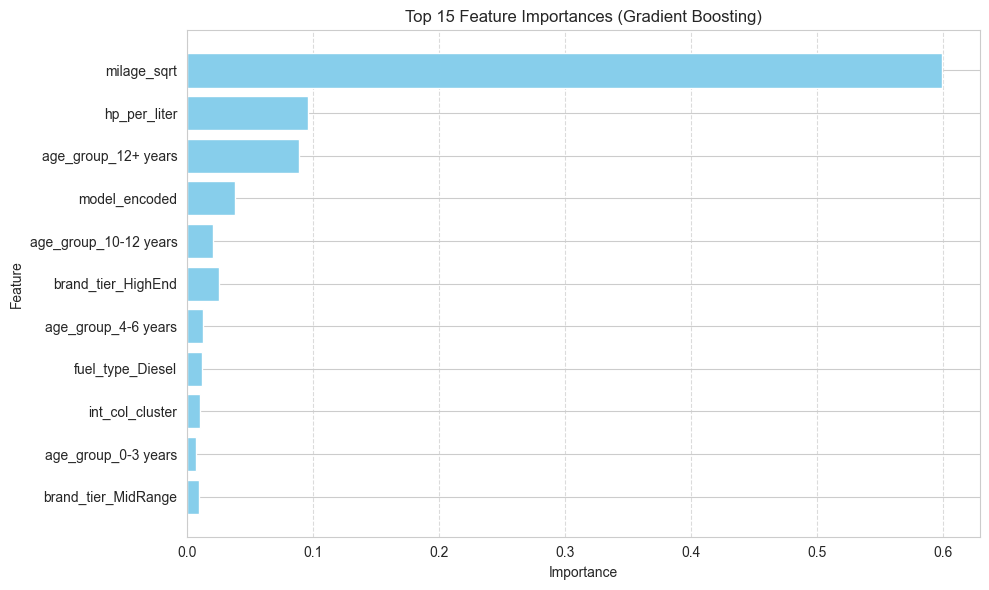

In [79]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming gb_grid is the fitted GridSearchCV object for Gradient Boosting
best_gb = gb_grid.best_estimator_

# Extract feature importances
importances = best_gb.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print("Top 15 Most Important Features (Gradient Boosting):")
display(importance_df.head(15))

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(importance_df.head(15)['feature'].iloc[::-1], 
         importance_df.head(15)['importance'].iloc[::-1],
         color='skyblue')
plt.title("Top 15 Feature Importances (Gradient Boosting)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Final Two Model Selections and Justification

We have tested a baseline OLS model, a Ridge regression, and a Gradient Boosting Regressor (GBR). The Gradient Boosting model currently outperforms the linear models significantly (R² ~0.80 vs. ~0.64 for the baseline and ~0.64 for Ridge). The feature importances from the GBR show that `milage_sqrt`, `model_encoded`, and `hp_per_liter` are critical predictors. The strong performance and nonlinear relationships suggest that tree-based methods and models capable of capturing non-linearities and interactions are advantageous.

### Criteria for Choosing the Final Two Models

1. **Coverage of Approaches**: We’ve explored linear (OLS, Ridge) and a boosted tree-based model (GBR). To further confirm which method generalizes best, let's try:
   - A **Random Forest (RF)**: Another tree-based method that can provide robust performance. While GBR is a boosting ensemble, RF uses bagging. Comparing RF to GBR will help us confirm if boosting provides a real edge over bagging in this dataset.
   - A **Support Vector Machine (SVM)** with a non-linear kernel: This model can capture complex patterns different from tree ensembles. It will serve as a contrast to both linear and tree-based methods. Given the non-linear relationships suggested by feature importance, an RBF kernel SVM may provide competitive results.

2. **Rationale for Random Forest**:
   - It handles non-linearities and interactions similar to GBR but uses bagging instead of boosting.
   - It can offer stable performance and might be less sensitive to hyperparameters compared to GBR.

3. **Rationale for SVM**:
   - A non-linear kernel (e.g., RBF) can model complex relationships not easily captured by linear models.
   - We can see if a kernel method outperforms or matches the performance of tree-based ensembles.

These two additional models will give us a broad comparison: we’ll have evaluated standard linear (OLS/Ridge), penalized linear (Ridge), tree-based (GBR and now RF), and a kernel-based non-linear model (SVM).

### Plan for Evaluation
We will tune key parameters for Random Forest and SVM and report:
- Best hyperparameters
- Validation RMSE and R²
- (Optional) Feature importance for RF to confirm stability of results
- (Optional) Support vectors count or decision function characteristics for SVM if we need interpretability.

This will guide us to the final model selection, where we choose the best-performing model or ensemble.

---

## Code for Random Forest and SVM with Hyperparameter Tuning

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/Users/rayva/Desktop/stat432_final/stat432_venv_311/lib/python3.11/site-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan 0.68418661 0.68113207 0.68168358
        nan        nan        nan 0.75225636 0.75126028 0.75208431
        nan        nan        nan 0.76243221 0.76376948 0.76434467]
  warnings.warn(


Best Random Forest Parameters: {'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 500}
Random Forest Validation RMSE: 0.3971
Random Forest Validation R²: 0.7708
Top 15 Most Important Features (Random Forest):


,feature,importance
7,milage_sqrt,0.314439
13,age_group_12+ years,0.132640
8,hp_per_liter,0.105267
9,age_group_0-3 years,0.076745
23,model_encoded,0.036146
19,brand_tier_HighEnd,0.035769
10,age_group_4-6 years,0.033525
0,ext_col_cluster,0.031598
24,brand_tier_HighEnd,0.031304
25,brand_tier_HighEnd,0.030577


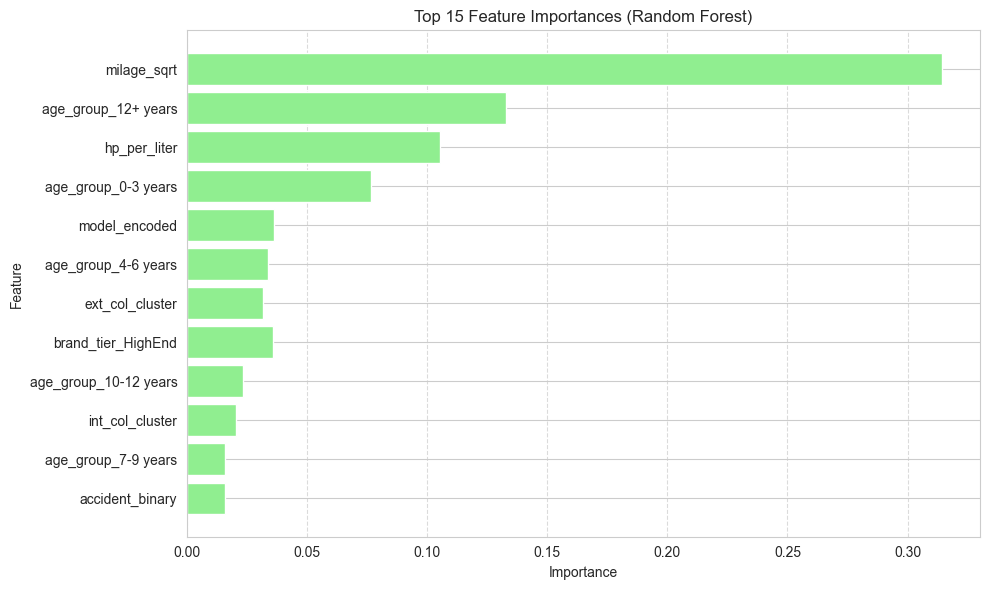

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best SVM Parameters: {'C': 100, 'epsilon': 0.1, 'gamma': 'scale'}
SVM Validation RMSE: 0.4559
SVM Validation R²: 0.6980


In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Custom RMSE scorer (defined previously)
def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_score = make_scorer(rmse_scorer, greater_is_better=False)

# -----------------------------
# Random Forest Tuning
# -----------------------------
rf_param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 15],
    'max_features': ['auto', 'sqrt']
}

rf_model = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_param_grid,
    scoring='r2',  # primary metric
    cv=5,
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train, y_train)

y_val_pred_rf = rf_grid.predict(X_val)
rf_rmse = rmse_scorer(y_val, y_val_pred_rf)
rf_r2 = r2_score(y_val, y_val_pred_rf)

print("Best Random Forest Parameters:", rf_grid.best_params_)
print(f"Random Forest Validation RMSE: {rf_rmse:.4f}")
print(f"Random Forest Validation R²: {rf_r2:.4f}")

# Feature importance for Random Forest
best_rf = rf_grid.best_estimator_
importances_rf = best_rf.feature_importances_
feature_names = X.columns

rf_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances_rf
}).sort_values(by='importance', ascending=False)

print("Top 15 Most Important Features (Random Forest):")
display(rf_importance_df.head(15))

plt.figure(figsize=(10,6))
plt.barh(rf_importance_df.head(15)['feature'].iloc[::-1],
         rf_importance_df.head(15)['importance'].iloc[::-1],
         color='lightgreen')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# -----------------------------
# SVM (RBF Kernel) Tuning
# -----------------------------
svm_param_grid = {
    'C': [1, 10, 100],
    'gamma': ['scale', 0.1, 0.01],
    'epsilon': [0.1, 0.01, 0.001]
}

svm_model = SVR(kernel='rbf')
svm_grid = GridSearchCV(
    estimator=svm_model,
    param_grid=svm_param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)

svm_grid.fit(X_train, y_train)

y_val_pred_svm = svm_grid.predict(X_val)
svm_rmse = rmse_scorer(y_val, y_val_pred_svm)
svm_r2 = r2_score(y_val, y_val_pred_svm)

print("Best SVM Parameters:", svm_grid.best_params_)
print(f"SVM Validation RMSE: {svm_rmse:.4f}")
print(f"SVM Validation R²: {svm_r2:.4f}")